<a href="https://colab.research.google.com/github/sinu-ops/chicago-crime-using-ANN/blob/main/Chicago_Crime_using_ANN%5B1%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chicago Crime Classification using Artificial Neural Networks (ANN)

### Binary Classification: Violent Crime (1) vs Non-Violent Crime (0)


## Project Description

Public safety agencies across the world use predictive analytics to improve
resource allocation, reduce response time, and identify crime patterns.
Chicago, one of the largest cities in the United States, publishes a detailed
public dataset containing millions of crime records from 2001 to the present.
This dataset includes information about the type of crime, time of occurrence,
location coordinates, arrest details, and multiple contextual attributes.

In this project, our objective is to build an Artificial Neural Network (ANN)
model that predicts whether a crime is *violent* or *non-violent* based on the
details available at the time of reporting. This classification helps law
enforcement agencies understand which incidents require immediate priority and
can also support strategic deployment of patrol units in high-risk areas.

This project is designed as a comprehensive deep learning hands-on exercise
covering data ingestion, data cleaning, feature engineering, normalization,
train–test split, ANN architecture design, loss functions, forward propagation
concepts, backpropagation intuition, hyperparameter tuning, regularization,
early stopping, batch normalization, model evaluation, and business
interpretation of model outcomes.

We will use **1–2 million rows** sampled from the official Chicago Data Portal
using its public API. The target variable will be defined as:

- **Violent Crime = 1**
- **Non-Violent Crime = 0**

This definition is constructed using the FBI's Uniform Crime Reporting (UCR)
categories, where violent crimes include offenses such as homicide, robbery,
assault, battery, sexual assault, and kidnapping. All other crime types are
considered non-violent for the purpose of this project.

The goal is to create a realistic, industry-level deep learning project that
allows us to apply the full set of neural network concepts learned in the
module while working on a large, high-volume dataset with real operational
significance.


## Defining the Target Variable: Violent vs Non-Violent Crime

The Chicago Crime dataset does not contain a ready-made "violent" column.
Therefore, we define our target variable using standard FBI UCR guidelines.

### Violent Crime Categories (label = 1)
- HOMICIDE
- BATTERY / AGGRAVATED BATTERY
- ASSAULT / AGGRAVATED ASSAULT
- ROBBERY
- CRIMINAL SEXUAL ASSAULT
- KIDNAPPING

### Non-Violent Crime Categories (label = 0)
All other crime categories including:
- THEFT
- BURGLARY
- NARCOTICS
- CRIMINAL DAMAGE
- MOTOR VEHICLE THEFT
- DECEPTIVE PRACTICE
- PROSTITUTION
- GAMBLING
- PUBLIC PEACE VIOLATION
- STALKING (non-aggravated)
- And all remaining categories

We will map each crime record to either 1 or 0 using the variable
`primary_type`, which describes the high-level crime category.


## Data Dictionary

The Chicago Crime dataset contains detailed information about each reported
crime. The key columns relevant for our model are:

- **primary_type**  
  High-level category of the crime (e.g., THEFT, ASSAULT, ROBBERY).  
  This is the basis for constructing our target variable.

- **description**  
  Detailed description of the crime subtype. Helps refine violent crime
  definitions.

- **location_description**  
  Describes where the incident occurred (street, residence, apartment, etc.).
  Useful for understanding environment patterns.

- **domestic**  
  Indicates whether the incident involved people with a domestic relationship.
  Domestically motivated incidents often have different dynamics.

- **arrest**  
  Indicates whether police made an arrest at the time of reporting. This is
  not our target but can act as a predictive feature.

- **year, month, day, hour**  
  Extracted from the timestamp. Helps in finding temporal crime trends.

- **latitude, longitude**  
  Geographical location of the incident. Important for spatial modeling and
  hotspot identification.

- **ward, community_area, beat, district**  
  Geographical and administrative divisions of Chicago. Helps capture
  neighborhood-level crime patterns.

- **IUCR (Illinois Uniform Crime Reporting code)**  
  Standardized crime code. Provides finer categorization.

These attributes collectively help us predict whether a crime is violent or
non-violent by analyzing spatial, temporal, and contextual factors.


# Data Import and Sampling Strategy

The Chicago Crime dataset is available through a public API that allows
incremental retrieval of crime records in batches. Since the full dataset
contains several million rows, working with the entire volume is not practical
for interactive model development. For this project, a sample of 200,000 rows
will be retrieved. This sample size is large enough to reveal spatial,
temporal, and contextual patterns while remaining efficient to process in
Google Colab.

The API provides parameters to limit the number of rows and define the offset
from which the records are downloaded. For this project, the first 200,000
rows are sufficient for building and training the ANN model. Once the data is
retrieved, it will be loaded into a pandas DataFrame for further processing,
cleaning, and feature engineering.


In [ ]:
import pandas as pd

# Base endpoint for downloading Chicago Crime data in CSV format
base_url = "https://data.cityofchicago.org/resource/ijzp-q8t2.csv"

# Number of rows to retrieve for the project
limit = 200000

# Starting position in the dataset (0 means fetch from the beginning)
offset = 0

# Construct the API URL with limit and offset parameters
url = f"{base_url}?$limit={limit}&$offset={offset}"

# Read the data directly into a pandas DataFrame
# The API returns a CSV response, which pandas can parse automatically
df = pd.read_csv(url)

# Display the first few records to verify the data format
df.head()


,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,14026652,JJ486777,2025-11-11T00:00:00.000,041XX S MAPLEWOOD AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,12.0,58.0,11,1160051.0,1877047.0,2025,2025-11-18T15:45:27.000,41.818323,-87.688394,"\n, \n(41.818323063, -87.688393655)"
1,14028522,JJ488922,2025-11-11T00:00:00.000,043XX S GREENWOOD AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,4.0,39.0,07,1184316.0,1876434.0,2025,2025-11-18T15:45:27.000,41.816107,-87.599401,"\n, \n(41.816106688, -87.599401433)"
2,14031849,JJ485623,2025-11-11T00:00:00.000,105XX S BENSLEY AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,STREET,False,False,...,10.0,51.0,14,NaN,NaN,2025,2025-11-18T15:45:27.000,NaN,NaN,NaN
3,14025251,JJ484928,2025-11-11T00:00:00.000,039XX W CHICAGO AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,APARTMENT,False,True,...,37.0,23.0,04B,1150078.0,1905057.0,2025,2025-11-18T15:45:27.000,41.895385,-87.724249,"\n, \n(41.895385497, -87.724249442)"
4,14025721,JJ485598,2025-11-11T00:00:00.000,015XX S KILDARE AVE,0710,THEFT,THEFT FROM MOTOR VEHICLE,VACANT LOT / LAND,False,False,...,24.0,29.0,06,1147967.0,1892196.0,2025,2025-11-18T15:45:27.000,41.860134,-87.732333,"\n, \n(41.860134288, -87.732333465)"


## Initial Observation of Loaded Data

The first few records confirm that the API request returned the expected
structure of the Chicago crime dataset. Each row represents a reported
incident along with its associated attributes. The dataset contains fields
such as the crime category, a detailed description, whether an arrest was
made, whether the incident was domestic, and the geographic and temporal
components of the event.

Several attributes, including latitude and longitude, appear to be present but
may contain missing values in some cases. The column `primary_type` provides
the high-level crime category, which is essential for constructing the
target variable for this project. The presence of administrative identifiers
such as ward, district, beat, and community area indicates that the dataset
captures neighbourhood-specific characteristics.

Before proceeding with cleaning or modeling, it is important to review the
overall structure of the dataset, examine the data types, and assess the
extent of missing values. These steps help determine what preprocessing is
required and how the features should be prepared for the neural network.


# Exploring the Structure and Basic Properties of the Dataset

Before beginning any cleaning or feature engineering, it is important to
examine the dataset at a broader level. Understanding the number of rows and
columns, the data types of each attribute, and the distribution of missing
values provides insight into how the dataset should be prepared for modeling.

This section focuses on identifying which features are numeric, which ones are
categorical, and which ones may require transformation. It also helps to
highlight columns that need special attention, such as those with formatting
issues, unused administrative identifiers, or partial missing values. A clear
understanding of the dataset structure ensures that the preprocessing steps
are aligned with the needs of the ANN model.


In [ ]:
# Display the shape of the dataset: number of rows and columns
df_shape = df.shape

# Display the list of columns and their data types
df_info = df.dtypes

# Count missing values in each column
df_missing = df.isnull().sum()

df_shape, df_info, df_missing


((200000, 22),
 id                        int64
 case_number              object
 date                     object
 block                    object
 iucr                     object
 primary_type             object
 description              object
 location_description     object
 arrest                     bool
 domestic                   bool
 beat                      int64
 district                  int64
 ward                    float64
 community_area          float64
 fbi_code                 object
 x_coordinate            float64
 y_coordinate            float64
 year                      int64
 updated_on               object
 latitude                float64
 longitude               float64
 location                 object
 dtype: object,
 id                        0
 case_number               0
 date                      0
 block                     0
 iucr                      0
 primary_type              0
 description               0
 location_description    813
 arrest    

## Understanding the Dataset Structure

The dataset contains 200,000 rows and 22 columns. The collection of data types
shows a mix of object, integer, float, and boolean fields. Many of the object
type attributes represent categorical variables such as the crime category,
crime description, IUCR code, and location description. Columns such as ward,
community area, latitude, longitude, and administrative boundaries appear as
numeric values.

A review of missing values indicates that most columns are fully populated,
with only a few fields containing gaps. The attribute `location_description`
has a moderate number of missing entries. A small number of missing values are
also present in administrative columns such as ward and community area.
Geographic coordinates have a small number of missing entries as well.

Before modeling, these gaps must be addressed. The next step involves
identifying which attributes will be used as features, which will be removed,
and how missing values should be handled. This ensures the model is trained on
a consistent and meaningful subset of the dataset.


# Preparing the Dataset for Feature Engineering and Modeling

Before constructing the target variable and training the ANN, it is necessary
to identify which features can contribute meaningfully to the prediction task.
Some columns are identifiers or administrative codes that do not provide
predictive value. Others contain information that is redundant or inconsistent
across records.

The focus of this stage is to remove attributes that do not contribute to the
model, clean the columns that will be retained, handle missing values in a
structured way, and prepare the dataset for constructing the binary target
variable. This includes decisions about temporal fields, location fields,
and text-based attributes that may require transformation or encoding.


In [ ]:
# Create a copy to avoid modifying the original DataFrame directly
data = df.copy()

# Drop columns that do not contribute to the ANN model
# - id, case_number: unique identifiers with no predictive value
# - iucr, fbi_code: highly granular codes, already reflected in primary_type
# - block: textual and inconsistent; not useful for our goal
# - updated_on: administrative timestamp not related to crime occurrence
# - location: geometry object not useful in raw format
columns_to_drop = [
    "id", "case_number", "iucr", "fbi_code",
    "block", "updated_on", "location"
]

data = data.drop(columns=columns_to_drop, errors="ignore")

# Handle missing values in essential fields
# For location_description, replace missing entries with a general category
data["location_description"] = data["location_description"].fillna("UNKNOWN")

# For latitude, longitude, and coordinate fields, drop rows with missing values
# These fields are important for spatial information and cannot be meaningfully imputed
data = data.dropna(subset=["latitude", "longitude"])

# Reset index after dropping rows
data = data.reset_index(drop=True)

# Display cleaned dataset structure
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199916 entries, 0 to 199915
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   date                  199916 non-null  object 
 1   primary_type          199916 non-null  object 
 2   description           199916 non-null  object 
 3   location_description  199916 non-null  object 
 4   arrest                199916 non-null  bool   
 5   domestic              199916 non-null  bool   
 6   beat                  199916 non-null  int64  
 7   district              199916 non-null  int64  
 8   ward                  199915 non-null  float64
 9   community_area        199915 non-null  float64
 10  x_coordinate          199916 non-null  float64
 11  y_coordinate          199916 non-null  float64
 12  year                  199916 non-null  int64  
 13  latitude              199916 non-null  float64
 14  longitude             199916 non-null  float64
dtype

## Interpretation of Cleaned Dataset Structure

The dataset now contains 15 columns after removing identifiers and other
administrative fields that do not contribute to the prediction task. All
remaining attributes have complete values except for a single missing entry in
`ward` and `community_area`, which is acceptable since the spatial coordinates
are already preserved. The attributes include temporal information, the crime
category, descriptive fields, arrest details, domestic indicators, location
descriptions, and spatial coordinates.

The cleaned structure confirms that the dataset is ready for further
preparation. The next steps involve constructing the target variable,
extracting useful time-based features from the date column, and preparing the
categorical and numeric fields for model training. The goal is to organize the
dataset so that it captures key spatial, temporal, and contextual patterns
that influence whether a crime is violent or non-violent.


# Constructing the Target Variable: Violent vs Non-Violent Crime

The dataset does not contain a direct indicator for violent crime, so this
attribute must be created from the `primary_type` column. Crime categories that
are classified as violent are grouped together based on standard crime
classification practices. These include offenses involving force or the threat
of force, such as homicide, assault, battery, robbery, kidnapping, and sexual
offenses.

This step adds a new column named `violent` to the dataset. Incidents falling
under the violent crime categories will be marked as 1, and all other crimes
will be marked as 0. This binary structure forms the target variable for the
ANN model.


In [ ]:
# Define categories that will be considered violent crimes
violent_categories = [
    "HOMICIDE",
    "ASSAULT",
    "BATTERY",
    "ROBBERY",
    "CRIMINAL SEXUAL ASSAULT",
    "KIDNAPPING",
    "HUMAN TRAFFICKING",
    "SEX OFFENSE",
    "AGGRAVATED ASSAULT",
    "AGGRAVATED BATTERY"
]

# Convert all crime categories to uppercase for consistency
data["primary_type"] = data["primary_type"].str.upper()

# Create the binary target variable
# 1 for violent crimes, 0 for non-violent crimes
data["violent"] = data["primary_type"].apply(
    lambda x: 1 if x in violent_categories else 0
)

# Display the distribution of the new target variable
data["violent"].value_counts()


,count
violent,
0,137351
1,62565


## Interpretation of the Target Variable Distribution

The new column `violent` successfully classifies each incident as either
violent or non-violent based on the crime category. The distribution shows a
higher number of non-violent crimes compared to violent crimes, which is a
natural pattern in most urban crime datasets. While the classes are imbalanced,
the dataset still contains a substantial number of violent cases, providing
enough variability for training the neural network.

This distribution also highlights the importance of choosing appropriate
evaluation metrics when dealing with classification tasks where one class is
more frequent than the other. As the project progresses, additional techniques
such as class weighting or balanced sampling may be applied depending on how
the imbalance influences model performance.


# Extracting Time-Based Features from the Date Field

The `date` column captures the timestamp when the crime was recorded. Neural
networks require numerical inputs, so the timestamp must be decomposed into
separate features that represent specific temporal components. These features
provide valuable context, such as whether the incident occurred on a weekend,
during late-night hours, or during a particular season.

This step converts the `date` column to a datetime format and extracts the
year, month, day of the month, day of the week, and hour. These attributes
offer additional explanatory power and help the model learn time-related
patterns in crime behavior.


In [ ]:
# Convert the date column to proper datetime format
data["date"] = pd.to_datetime(data["date"], errors="coerce")

# Extract useful time-based features
data["year"] = data["date"].dt.year
data["month"] = data["date"].dt.month
data["day"] = data["date"].dt.day
data["day_of_week"] = data["date"].dt.dayofweek  # Monday=0, Sunday=6
data["hour"] = data["date"].dt.hour

# Drop the original date column since it has been decomposed
data = data.drop(columns=["date"])

# Display the first few rows to verify new features
data.head()


,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,x_coordinate,y_coordinate,year,latitude,longitude,violent,month,day,day_of_week,hour
0,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,921,9,12.0,58.0,1160051.0,1877047.0,2025,41.818323,-87.688394,0,11,11,1,0
1,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,222,2,4.0,39.0,1184316.0,1876434.0,2025,41.816107,-87.599401,0,11,11,1,0
2,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,APARTMENT,False,True,1112,11,37.0,23.0,1150078.0,1905057.0,2025,41.895385,-87.724249,1,11,11,1,0
3,THEFT,THEFT FROM MOTOR VEHICLE,VACANT LOT / LAND,False,False,1012,10,24.0,29.0,1147967.0,1892196.0,2025,41.860134,-87.732333,0,11,11,1,0
4,INTERFERENCE WITH PUBLIC OFFICER,OBSTRUCTING IDENTIFICATION,STREET,True,False,1512,15,29.0,25.0,1137312.0,1902246.0,2025,41.887911,-87.771204,0,11,11,1,0


## Interpretation of Newly Created Time-Based Features

The date column has been successfully converted into separate numeric
attributes: year, month, day, day of the week, and hour. These fields now
represent the temporal dimensions of each crime in a format that is suitable
for neural network models. Temporal patterns often play a key role in crime
activity, such as weekend spikes, late-night incidents, and seasonal trends.

Since the timestamp has been decomposed into its components, the original date
column is no longer required and has been removed. With the addition of these
numeric fields, the dataset now captures a wider range of contextual
information, preparing it for the next stages of transformation and encoding.


# Preparing Categorical and Numeric Features for ANN Modeling

The dataset contains a mix of categorical, numeric, and boolean fields. Neural
networks require numerical inputs, so all categorical attributes must be
encoded into numeric form. One-hot encoding is appropriate because it treats
each category independently without imposing an ordinal relationship. This
preserves the integrity of the categorical fields.

Numeric attributes and binary fields can be included directly, but scaling is
required to ensure that features with larger ranges do not dominate the
training process. This step constructs the final feature matrix by encoding
categorical variables, combining all relevant numeric fields, and preparing the
target variable for model training.


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Identify feature groups

categorical_cols = [
    "primary_type",
    "description",
    "location_description"
]

numeric_cols = [
    "beat",
    "district",
    "ward",
    "community_area",
    "x_coordinate",
    "y_coordinate",
    "latitude",
    "longitude",
    "month",
    "day",
    "day_of_week",
    "hour"
]
binary_cols = [
    "arrest",
    "domestic"
]

# Define the target variable
target_col = "violent"

# Create the preprocessing transformer:
# - One-hot encode categorical variables
# - Scale numeric features
# - Keep binary variables as they are

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numeric_cols)
    ],
    remainder="passthrough"  # Keeps arrest, domestic, and the target
)

# Separate features and target
X = data[categorical_cols + numeric_cols + binary_cols]
y = data[target_col]

# Apply the transformer to the feature matrix
X_processed = preprocessor.fit_transform(X)

X_processed.shape, y.shape


((199916, 484), (199916,))

## Interpretation of Encoded and Scaled Feature Matrix

The transformed feature matrix contains 484 columns, which is expected because
the one-hot encoding of categorical fields expands each category into a
separate binary feature. Numeric attributes have been standardized to ensure
that differences in scale do not influence the training process. The binary
variables for arrest and domestic incidents remain unchanged and are included
in the final matrix.

The shape of the processed matrix confirms that all selected features have been
converted into a format suitable for neural network training. The number of
rows remains consistent with the dataset, and the expanded set of input
features reflects the structure required for an ANN to learn from both
categorical and continuous information. The next step is to divide the data
into training and testing subsets in preparation for building the model.


# Splitting the Dataset into Training and Testing Sets

With the preprocessed feature matrix ready, the next step is to divide the
data into training and testing subsets. This ensures that the model is trained
on one portion of the dataset and evaluated on another portion that the model
has not seen before. Stratified splitting is used so that the proportion of
violent and non-violent cases remains consistent across both subsets.

The training set will be used to fit the neural network, while the test set
will provide an unbiased evaluation of model performance. A standard split of
80 percent for training and 20 percent for testing is appropriate for this
problem.


In [ ]:
# Perform an 80-20 stratified split to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X_processed,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Display the shapes of the resulting sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((159932, 484), (39984, 484), (159932,), (39984,))

## Interpretation of the Training and Testing Split

The dataset has been divided into training and testing subsets using an
80–20 ratio while preserving the class distribution through stratified
sampling. The training set contains 159,932 records, and the test set
contains 39,984 records. Both sets retain the same feature width of 484
columns, which reflects the expanded representation from one-hot encoding.

Maintaining the class proportions ensures that both subsets reflect the
original balance between violent and non-violent incidents. This balance is
important for producing a stable and reliable evaluation of the model. The
training set will be used to fit the neural network, and the test set will be
used to assess how well the model generalizes to unseen cases.


# Distribution of Violent vs Non-Violent Crimes

Before exploring the dataset in detail, it is important to understand how the
target variable is distributed. This chart shows the number of incidents
classified as violent and non-violent. Since the model is being trained to
distinguish between these two categories, an understanding of their relative
frequency helps clarify the level of imbalance present in the dataset.

A significant imbalance may influence how the model learns during training
and may also affect the choice of evaluation metrics. Visualizing the
distribution provides a clear picture of how the classes are represented.


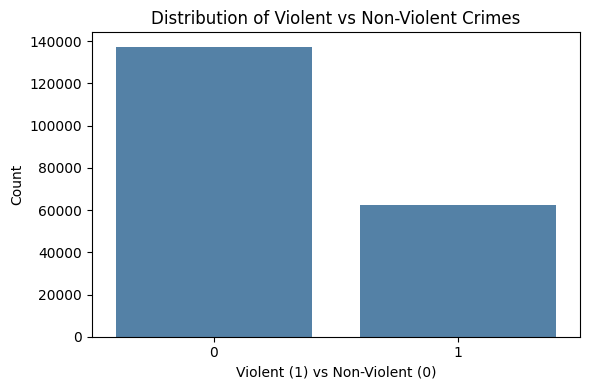

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))

# Use the API: supply the dataframe and specify only x
# Use 'color' instead of 'palette' to avoid deprecation warnings
sns.countplot(data=data, x="violent", color="steelblue")

plt.title("Distribution of Violent vs Non-Violent Crimes")
plt.xlabel("Violent (1) vs Non-Violent (0)")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


## Interpretation of Violent vs Non-Violent Crime Distribution

The chart shows a clear difference between the number of non-violent and
violent crimes. Non-violent crimes form the larger share of the dataset, which
is expected in most urban crime environments. Even though the classes are not
perfectly balanced, both categories contain a substantial number of records.
This allows the neural network to learn distinct patterns for both groups.

Understanding this distribution is important because it affects model
evaluation. When classes differ in size, accuracy alone may not fully reflect
the model’s performance, and additional metrics such as precision, recall, and
the confusion matrix become valuable during the validation phase.


# Top 15 Most Frequent Crime Categories

Understanding which crime categories occur most frequently helps provide
context for the overall dataset. The `primary_type` column contains the
high-level classification for each reported incident. Examining the most
common crime types offers insight into city-wide patterns and the general
composition of criminal activity.

This information is also helpful for feature interpretation. Even though the
neural network predicts whether a crime is violent or non-violent, the type
of crime often carries implicit contextual meaning, making it a relevant
attribute. The chart below highlights the top 15 crime categories based on
their frequency in the dataset.


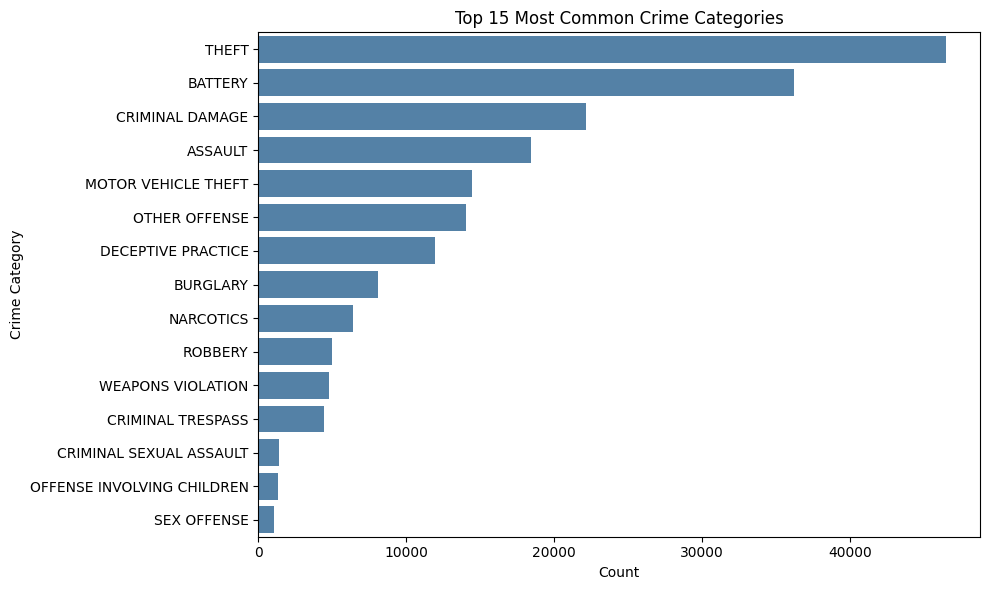

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate top 15 crime categories
top_crimes = data["primary_type"].value_counts().head(15)

plt.figure(figsize=(10,6))

# Use barplot with 'color' to avoid Seaborn palette warnings
sns.barplot(x=top_crimes.values, y=top_crimes.index, color="steelblue")

plt.title("Top 15 Most Common Crime Categories")
plt.xlabel("Count")
plt.ylabel("Crime Category")

plt.tight_layout()
plt.show()


## Interpretation of Top Crime Categories

The chart highlights the most frequent crime categories in the dataset. Theft
is the most common incident by a wide margin, followed by battery and criminal
damage. Categories such as assault, motor vehicle theft, and deceptive
practice also appear frequently. These patterns reflect typical urban crime
distributions, where property-related crimes tend to dominate over violent
offenses.

Although the model’s objective is to classify incidents as violent or
non-violent, understanding the prevalence of different crime groups provides
helpful context. Some categories, such as assault, battery, robbery, and
criminal sexual assault, contribute directly to the violent crime class. Others
serve as strong indicators of non-violent behavior. This breakdown also
supports the feature engineering process by showing which categories may carry
more predictive influence in the neural network.


# Top 15 Most Common Crime Locations

The `location_description` field describes where each crime occurred. Examining
the most common locations provides insight into environmental patterns that may
influence crime behavior. Some locations, such as streets or residential areas,
naturally have higher incident counts due to population density and foot
traffic. Others represent more specific settings such as apartments, alleys, or
parking lots.

Understanding where crimes frequently occur helps highlight spatial context and
can provide additional support when interpreting the model’s behavior. The chart
below shows the top 15 crime locations based on their frequency.


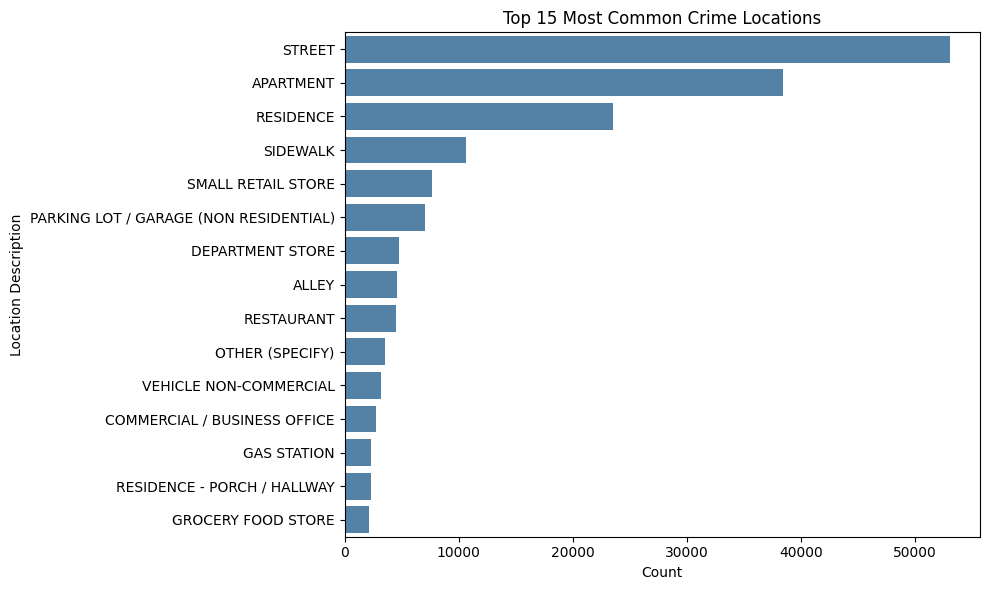

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute top 15 locations
top_locations = data["location_description"].value_counts().head(15)

plt.figure(figsize=(10,6))

# Use color instead of palette to avoid warnings
sns.barplot(
    x=top_locations.values,
    y=top_locations.index,
    color="steelblue"
)

plt.title("Top 15 Most Common Crime Locations")
plt.xlabel("Count")
plt.ylabel("Location Description")

plt.tight_layout()
plt.show()


## Interpretation of Crime Location Patterns

The chart shows that most reported incidents occur on streets, followed by
apartments and residential locations. Sidewalks and small retail stores also
contribute significantly to crime volume. These patterns reflect the typical
movement and gathering areas within a city, where both pedestrian activity and
residential density create more opportunities for incidents.

Locations toward the lower end of the list, such as parking garages, alleys,
restaurants, and business offices, occur with moderate frequency but still
represent meaningful environments for crime analysis. Understanding where
crimes most commonly occur provides a spatial context that contributes to the
feature set used by the neural network, especially when combined with
geographic coordinates and time-based indicators.


# Crime Frequency by Hour of the Day

Crime activity often follows recognizable daily patterns. Examining how crime
frequency varies by hour helps reveal whether incidents cluster around specific
times, such as late night, early morning, or evening hours. These patterns may
differ for violent and non-violent incidents, and understanding the general
distribution provides a strong basis for deeper temporal analysis.

The chart below shows the total number of crimes recorded for each hour of the
day. This helps highlight periods with increased activity and supports the
feature engineering process related to time-of-day variables.


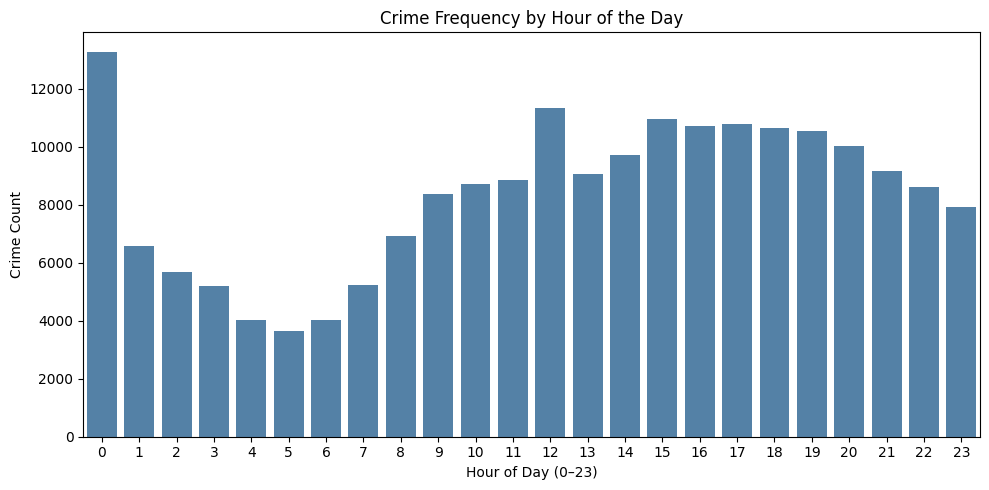

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate crimes per hour
hour_counts = data["hour"].value_counts().sort_index()

plt.figure(figsize=(10,5))

sns.barplot(
    x=hour_counts.index,
    y=hour_counts.values,
    color="steelblue"
)

plt.title("Crime Frequency by Hour of the Day")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Crime Count")

plt.tight_layout()
plt.show()


## Interpretation of Crime Distribution by Hour of Day

The hourly distribution shows clear patterns in crime activity. Incidents peak
around midnight, followed by a sharp decline in the early morning hours. Crime
volume remains low between approximately 3 AM and 6 AM, which is consistent
with typical sleep cycles and reduced public activity.

As the day progresses, incident counts rise steadily, reaching another high
point around midday and continuing at elevated levels through the afternoon
and early evening. Activity remains strong until approximately 8 PM before
gradually decreasing into the night.

These temporal patterns suggest that time of day is an important contextual
feature for the neural network. The distinct shape of the distribution may
also indicate differing behavioral trends between violent and non-violent
crimes, which will be explored in later visualizations.


# Crime Frequency by Day of the Week

Weekly crime patterns often differ based on work schedules, nightlife
activity, and weekend behavior. Examining the distribution of incidents
across the days of the week helps reveal whether certain days consistently
show higher or lower activity.

The `day_of_week` variable encodes Monday as 0 and Sunday as 6. The chart
below displays how crime frequency varies across these seven categories.
Understanding this distribution provides additional insight into the temporal
structure of the dataset.


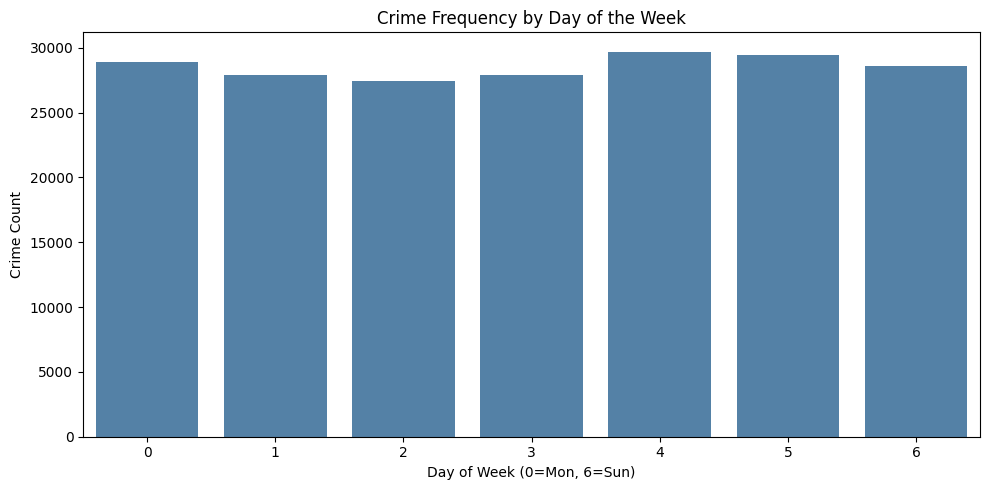

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate crimes per day of week
dow_counts = data["day_of_week"].value_counts().sort_index()

plt.figure(figsize=(10,5))

sns.barplot(
    x=dow_counts.index,
    y=dow_counts.values,
    color="steelblue"
)

plt.title("Crime Frequency by Day of the Week")
plt.xlabel("Day of Week (0=Mon, 6=Sun)")
plt.ylabel("Crime Count")

plt.tight_layout()
plt.show()


## Interpretation of Crime Distribution by Day of the Week

The daily distribution shows that crime levels remain relatively consistent
across the week, with only slight variations between days. The number of
incidents tends to be slightly higher toward the middle and end of the week,
particularly around Thursday and Friday. Monday and Tuesday show marginally
lower activity, but the differences are not substantial.

This uniformity indicates that crime in the dataset is not strongly tied to
specific days of the week. Instead, the underlying patterns are likely driven
more by time of day, location, and crime type rather than weekday effects.
Still, including the day-of-week feature provides additional context that may
support the neural network’s ability to capture subtle temporal behaviors.


# Crime Frequency by Month

Seasonal trends can influence crime patterns due to changes in weather,
daylight hours, and social activity. Examining monthly crime totals helps
identify whether certain months consistently experience higher or lower levels
of criminal activity.

The `month` variable ranges from 1 to 12. The chart below shows the number of
incidents recorded in each month, allowing us to explore any seasonal
variations in the dataset.


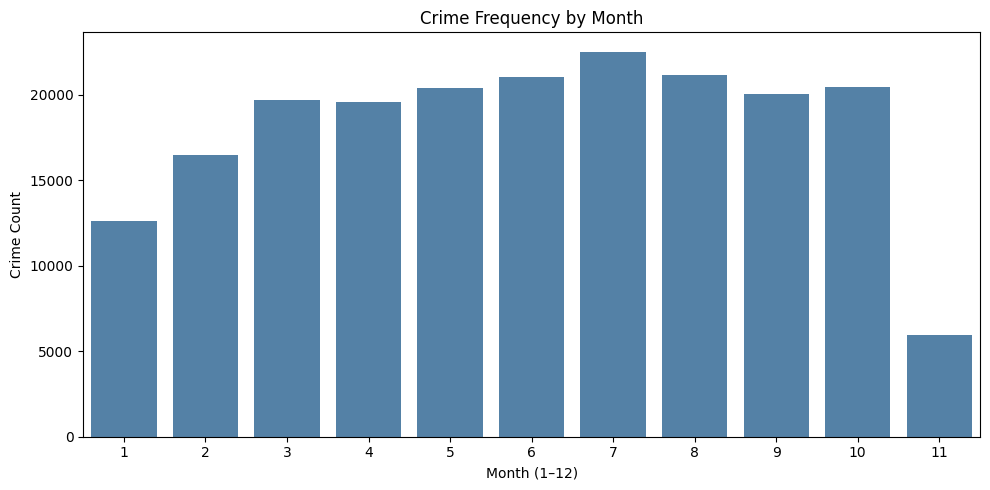

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count crimes by month
month_counts = data["month"].value_counts().sort_index()

plt.figure(figsize=(10,5))

sns.barplot(
    x=month_counts.index,
    y=month_counts.values,
    color="steelblue"
)

plt.title("Crime Frequency by Month")
plt.xlabel("Month (1–12)")
plt.ylabel("Crime Count")

plt.tight_layout()
plt.show()


## Interpretation of Crime Distribution by Month

The monthly distribution reveals a clear seasonal trend. Crime counts increase
from January onward, reaching their highest levels in the summer months. June,
July, and August show the greatest number of incidents, which aligns with
patterns observed in many cities where warmer weather increases outdoor
activity and public interaction.

A noticeable decline appears in November, which may be influenced by shorter
daylight hours, colder conditions, or incomplete data for the latest months
in the dataset. The overall pattern shows that seasonal factors play a
significant role in shaping crime activity, making the month feature an
important temporal input for the neural network.


# Violent vs Non-Violent Crimes by Hour of the Day

Comparing violent and non-violent incidents across the hours of the day helps
identify whether the two categories follow similar or different daily rhythms.
Certain types of violent crimes tend to occur more frequently during late-night
or early-morning hours, while non-violent crimes may align more with business
hours or daytime activity.

The chart below visualizes both distributions side by side, allowing us to
observe any notable contrasts in hourly patterns between the two groups.


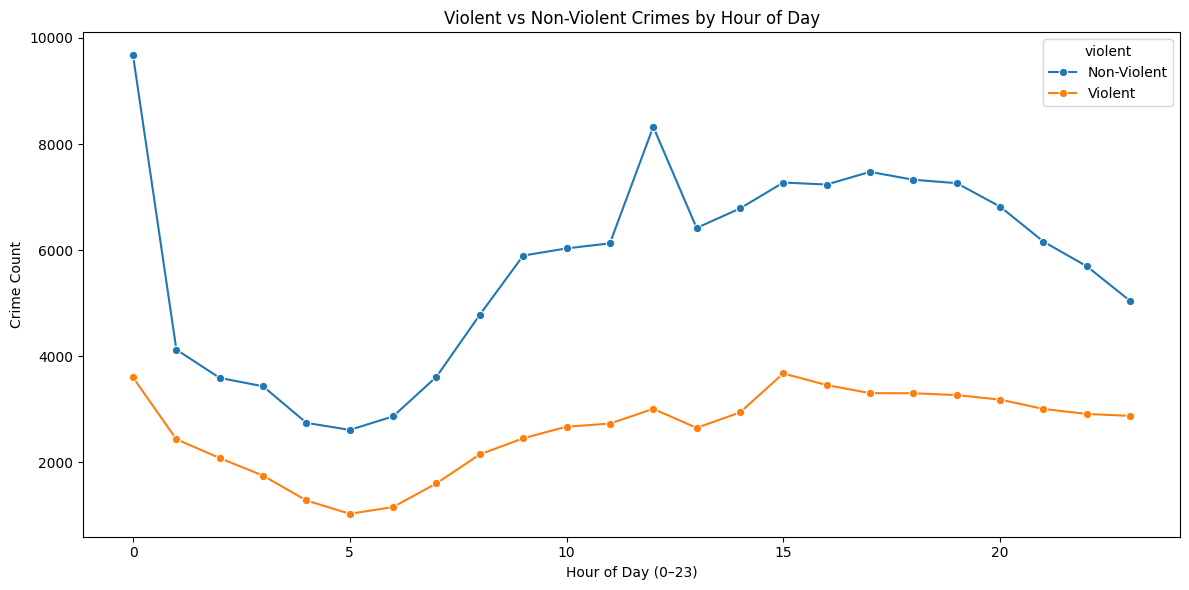

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))

# Group by hour and violent status
hourly_violent = data.groupby(["hour", "violent"]).size().reset_index(name="count")

# Convert violent from numeric to label for clearer visualization
hourly_violent["violent"] = hourly_violent["violent"].map({0: "Non-Violent", 1: "Violent"})

sns.lineplot(
    data=hourly_violent,
    x="hour",
    y="count",
    hue="violent",
    marker="o"
)

plt.title("Violent vs Non-Violent Crimes by Hour of Day")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Crime Count")

plt.tight_layout()
plt.show()


## Interpretation of Violent vs Non-Violent Crime by Hour of the Day

The comparison between violent and non-violent incidents reveals clear
differences in their hourly patterns. Non-violent crimes peak sharply around
midnight and then decline rapidly during the early morning hours. As the day
progresses, non-violent activity rises again, reaching consistently high levels
between late morning and early evening.

Violent crimes display a different rhythm. While they also show higher activity
around midnight, the decline in early morning hours is more gradual. Violent
incidents increase again during the afternoon and show noticeable peaks between
midday and evening hours.

The presence of distinct shapes in both lines suggests that violent and
non-violent crimes may be influenced by different behavioral or situational
factors. These differences support the use of temporal features as meaningful
inputs to the neural network model.


# Violent vs Non-Violent Crimes by Day of Week

This visualization compares the weekly distribution of violent and non-violent
incidents. While overall crime counts remain fairly consistent across the week,
violent crimes may follow slightly different patterns depending on social
activity, weekend behavior, or other environmental factors.

Plotting both trends side by side highlights whether violent crimes exhibit
any weekday-specific tendencies compared to non-violent crimes.


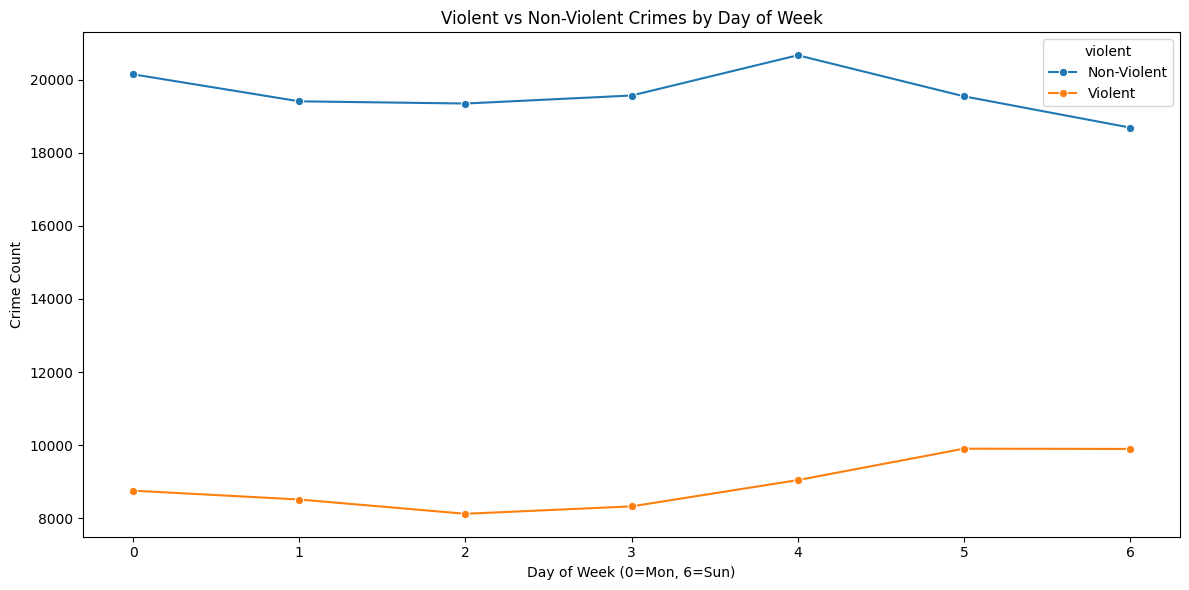

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))

# Group by day_of_week and violent indicator
dow_violent = data.groupby(["day_of_week", "violent"]).size().reset_index(name="count")

# Map labels for clarity
dow_violent["violent"] = dow_violent["violent"].map({0: "Non-Violent", 1: "Violent"})

sns.lineplot(
    data=dow_violent,
    x="day_of_week",
    y="count",
    hue="violent",
    marker="o"
)

plt.title("Violent vs Non-Violent Crimes by Day of Week")
plt.xlabel("Day of Week (0=Mon, 6=Sun)")
plt.ylabel("Crime Count")

plt.tight_layout()
plt.show()


## Interpretation of Violent vs Non-Violent Crimes by Day of Week

The weekly comparison shows that non-violent crimes follow a relatively steady
pattern across all seven days, with small peaks around the middle of the week
and a slight decline toward Sunday. The variations are mild, indicating that
weekday dynamics do not strongly influence non-violent activity.

Violent crimes, however, display a clearer upward trend toward the weekend.
There is a gradual increase from mid-week onward, with noticeable peaks on
Fridays and Saturdays. This pattern aligns with common behavioral trends
related to nightlife, social gatherings, and increased public activity during
weekend periods.

The differences between the two lines highlight the value of incorporating
the day-of-week feature into the model. Even though the variations are not
extreme, they provide additional temporal context that can help the neural
network capture subtle behavioral patterns.


# Spatial Distribution of Crimes (Latitude vs Longitude)

Geographic patterns are often central to crime analysis. Plotting incidents by
their latitude and longitude helps reveal areas with dense activity and visual
clusters. Although this scatterplot does not provide the precision of a full
geospatial heatmap, it offers a clear overview of how crimes are distributed
across the city.

Because the dataset contains a large number of records, a low transparency
(alpha) level is used to avoid overcrowding and to highlight dense regions
more effectively.


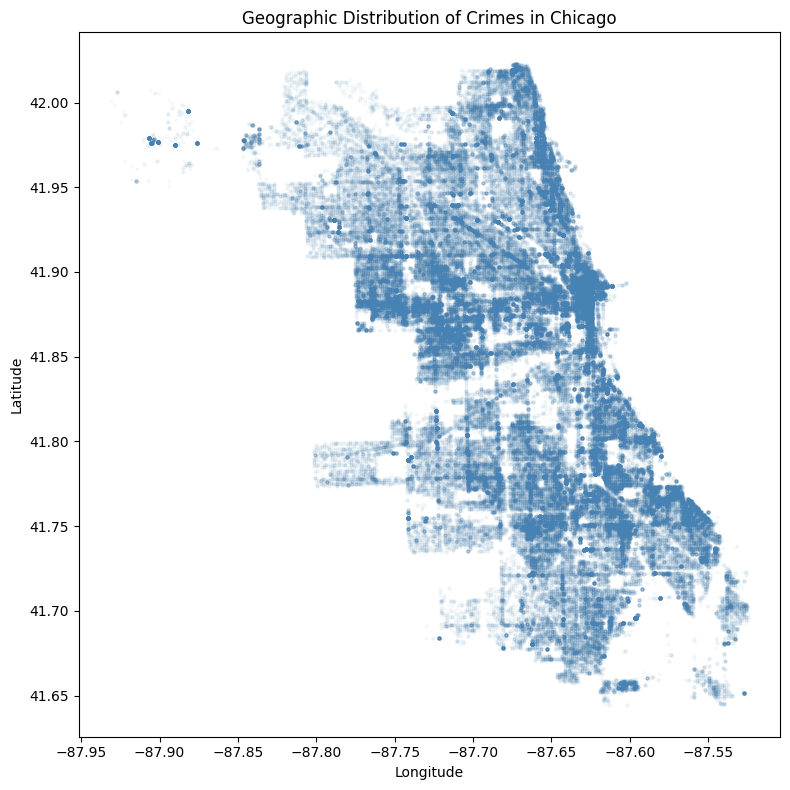

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))

# Scatter plot with alpha for density visibility
plt.scatter(
    data["longitude"],
    data["latitude"],
    s=5,
    alpha=0.03,
    color="steelblue"
)

plt.title("Geographic Distribution of Crimes in Chicago")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.tight_layout()
plt.show()


## Interpretation of Geographic Crime Distribution

The scatter plot provides a clear visual outline of Chicago, formed entirely by
the geographic coordinates of crime incidents. Areas with higher point density
represent regions with more frequent activity. The dense clustering along the
central and southern regions of the map indicates concentrated crime zones,
while lighter areas represent regions with fewer incidents.

Even though this is not a full geospatial heatmap, the density patterns are
visible through the overlapping points. The distribution highlights the value
of latitude and longitude as predictive features, especially in a large urban
environment where crime levels vary significantly by neighborhood and district.


# Crime Count by Police District

Police districts represent administrative boundaries used in law enforcement.
Examining how many crimes are reported in each district helps reveal patterns
in workload, population density, and geographic clustering of incidents.

The chart below shows the number of crimes recorded in each district, allowing
us to compare activity levels across different administrative zones.


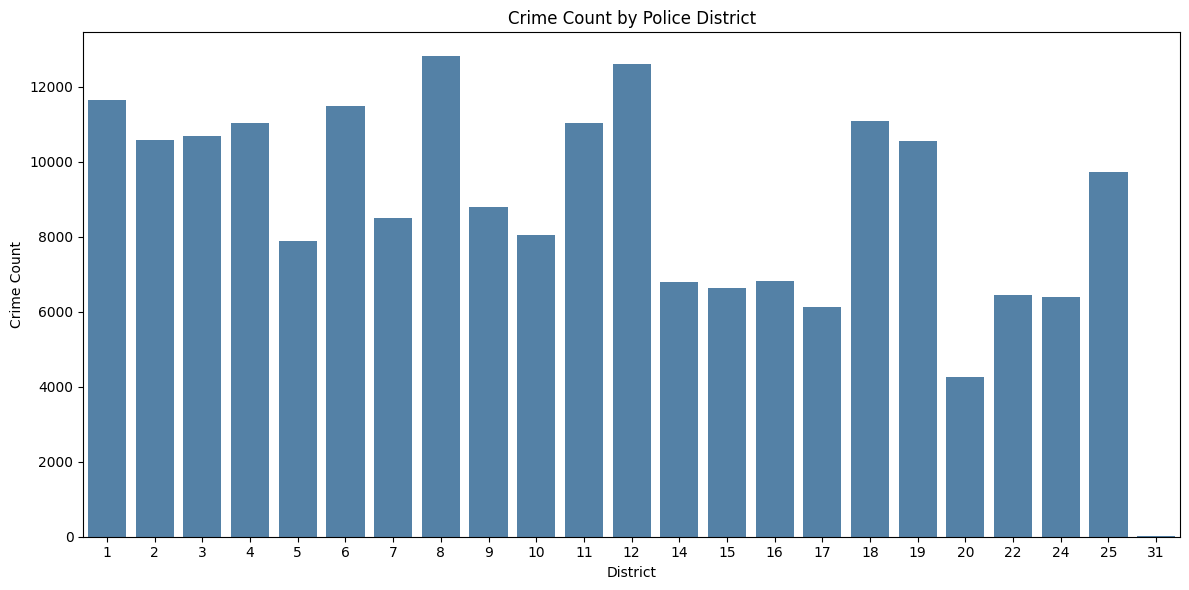

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count crimes by district
district_counts = data["district"].value_counts().sort_index()

plt.figure(figsize=(12,6))

sns.barplot(
    x=district_counts.index,
    y=district_counts.values,
    color="steelblue"
)

plt.title("Crime Count by Police District")
plt.xlabel("District")
plt.ylabel("Crime Count")

plt.tight_layout()
plt.show()


## Interpretation of Crime Count by Police District

The chart shows significant variation in crime counts across different police
districts. Several districts record over 12,000 incidents, while others fall
well below 7,000 cases. These differences reflect a mixture of factors such as
population density, neighborhood characteristics, and enforcement activity.

Districts with higher volumes often correspond to areas with greater foot
traffic, commercial activity, or densely populated residential zones. Lower
volume districts typically represent regions with smaller populations or
reduced reporting frequency. Including district information in the model helps
the neural network capture spatial differences in crime patterns across the
city.


# Crime Count by Community Area

Community areas offer a finer level of geographic segmentation compared to
police districts. Examining the number of crimes in each community area
provides a clearer understanding of localized crime intensity across the city.

Some areas naturally experience higher activity due to population density,
commercial zones, or transportation hubs. The chart below shows how crime
counts vary across different community areas.


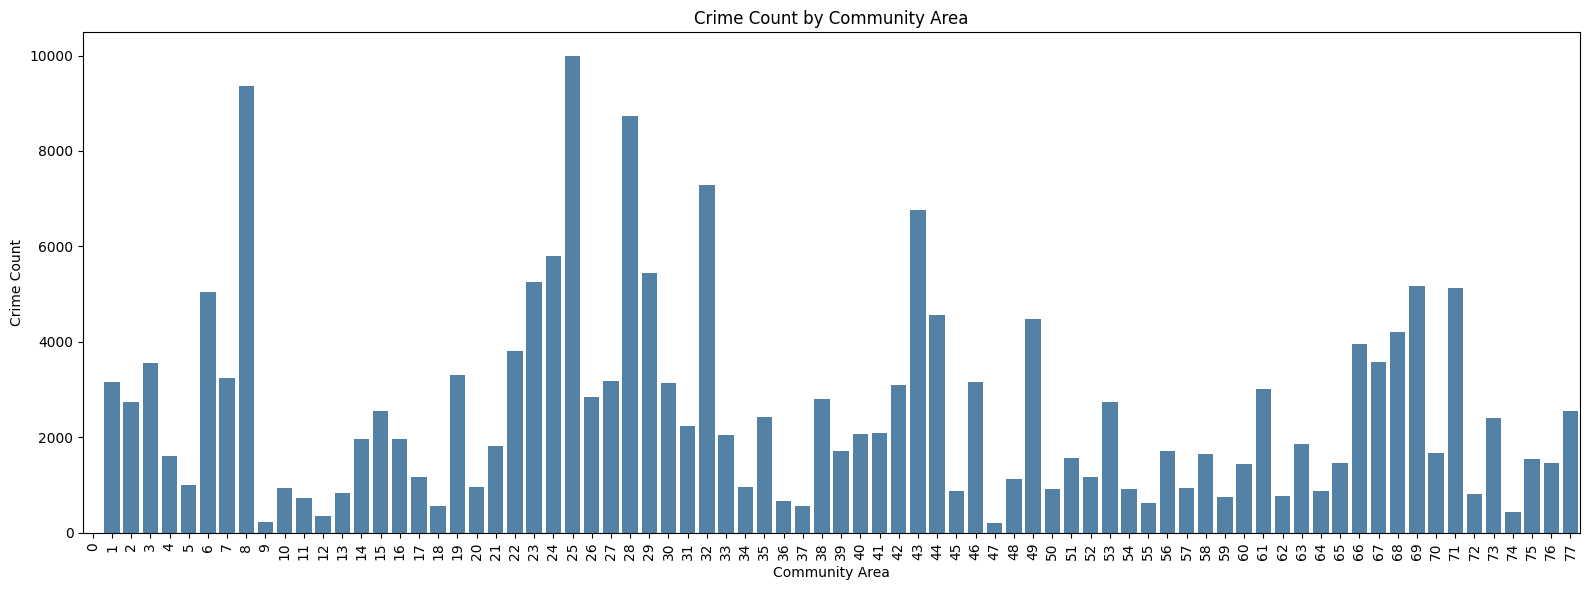

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fill missing community_area with 0 (unknown category)
data["community_area"] = data["community_area"].fillna(0)

# Convert to integer safely
data["community_area"] = data["community_area"].astype(int)

# Recompute counts after cleaning
community_counts = data["community_area"].value_counts().sort_index()

plt.figure(figsize=(16,6))

sns.barplot(
    x=community_counts.index,
    y=community_counts.values,
    color="steelblue"
)

plt.title("Crime Count by Community Area")
plt.xlabel("Community Area")
plt.ylabel("Crime Count")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


## Interpretation of Crime Count by Community Area

The distribution shows clear variation in crime intensity across community
areas. A few areas report extremely high activity, exceeding 9,000 incidents,
while others show much lower volumes. These differences reflect how population
density, land use, commercial zones, and socio-economic conditions vary across
the city.

The presence of tall peaks in certain community areas suggests that crime
activity is highly localized rather than evenly spread. Some community areas
serve as major residential or business hubs, which naturally attract greater
numbers of incidents. Lower-activity areas may be more residential, less
densely populated, or have limited commercial operations.

Understanding this variation highlights the importance of spatial context in
the model. Community area is a useful feature because it captures localized
patterns that latitude and longitude alone may not fully represent.


# Top 25 Police Beats by Crime Count

The complete set of police beats is too large for a readable bar chart, so the
visualization below focuses on the 25 beats with the highest number of crime
incidents. This provides a clear view of the most active patrol zones and
highlights localized hotspots within the city.

Displaying the top beats rather than all beats creates a more interpretable
chart while still preserving important spatial information.


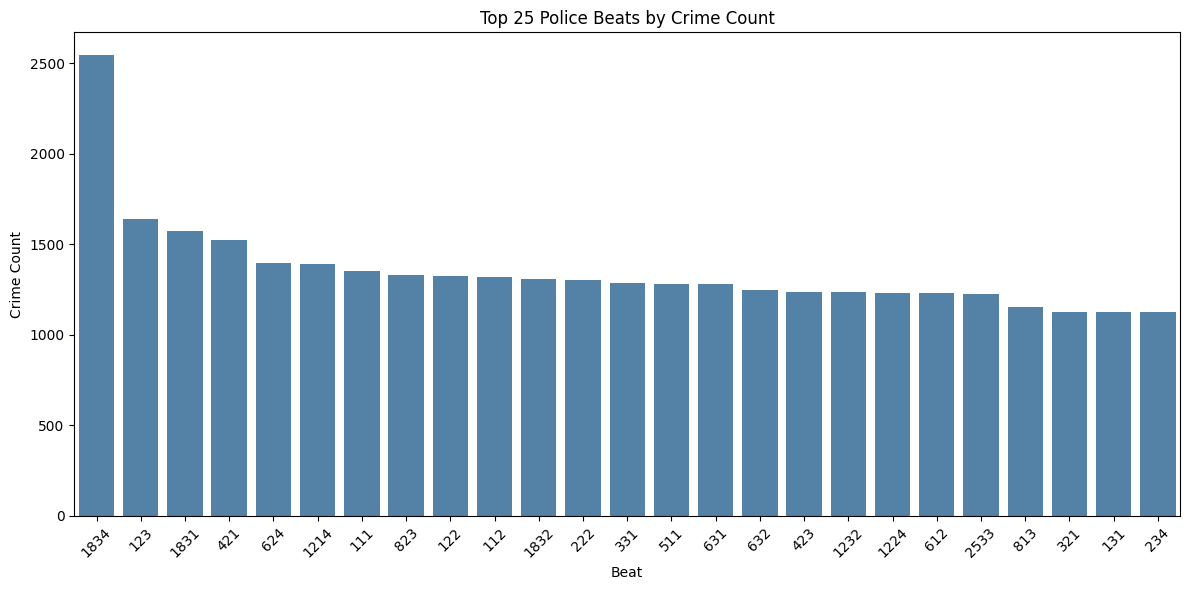

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute beat counts and take the top 25
top_beats = data["beat"].value_counts().head(25)

plt.figure(figsize=(12,6))

sns.barplot(
    x=top_beats.index.astype(str),
    y=top_beats.values,
    color="steelblue"
)

plt.title("Top 25 Police Beats by Crime Count")
plt.xlabel("Beat")
plt.ylabel("Crime Count")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## Interpretation of Top 25 Police Beats by Crime Count

The chart shows the 25 beats with the highest number of reported incidents.
A small number of beats stand out as clear hotspots, recording crime counts
that are significantly higher than the others. These areas likely represent
regions with high foot traffic, dense residential zones, or major commercial
corridors.

For most of the top 25 beats, crime volumes fall within a narrower range,
indicating moderately elevated activity levels. The distribution highlights
that crime clusters are not evenly dispersed across the city but instead
concentrated within certain localized patrol zones.

Focusing on the top beats provides a practical way to visualize hotspot
activity without overwhelming the chart with every beat in the dataset.
This granularity reinforces the importance of geographic features when
training the neural network.


# Correlation Heatmap for Numeric Features

This heatmap provides an overview of how numeric variables relate to one
another. Strong correlations can indicate overlapping information, while weak
relationships suggest that features contribute independently to the model.

Visualizing these correlations helps reveal which spatial or temporal
attributes move together and supports decisions about model design and
feature selection. It also highlights why normalization and scaling are
important when working with neural networks.


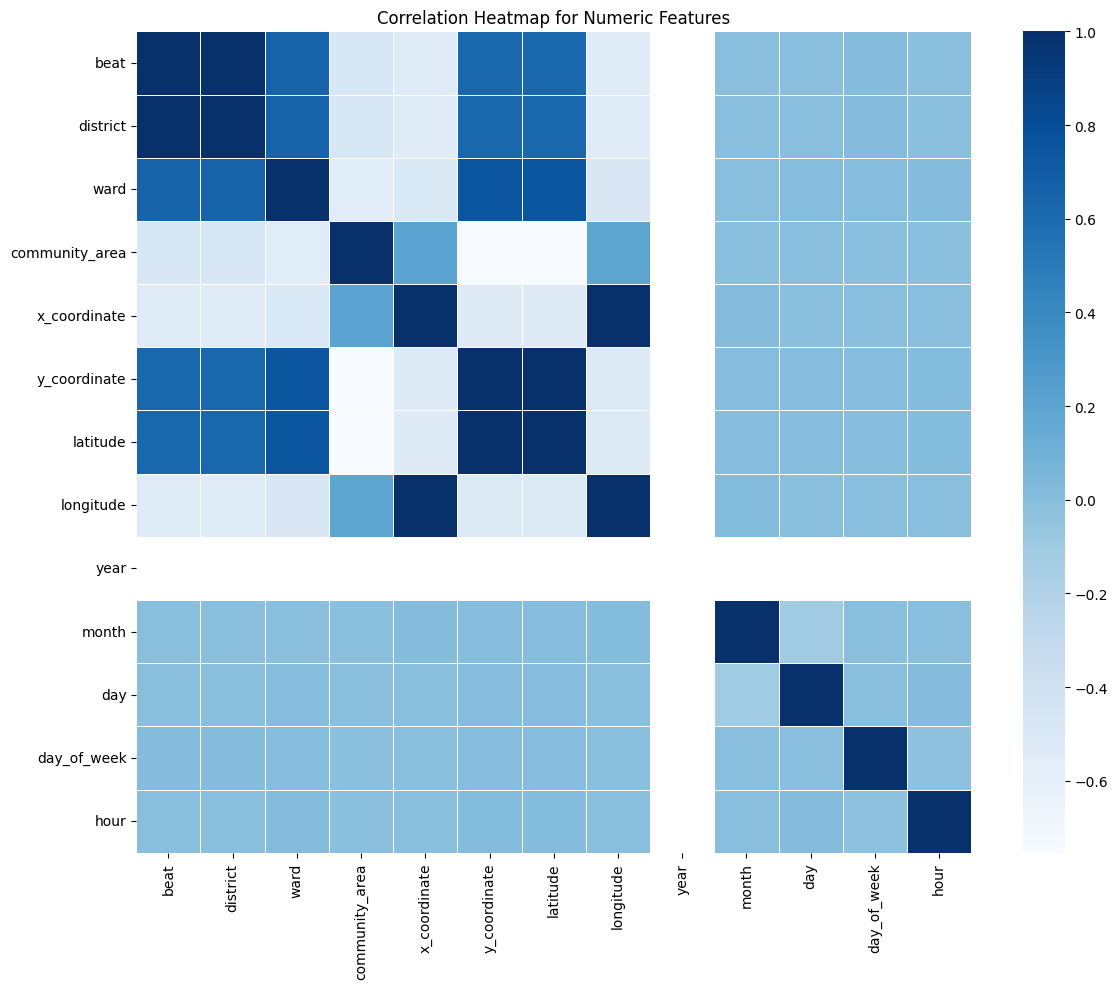

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns only
numeric_cols_for_corr = [
    "beat",
    "district",
    "ward",
    "community_area",
    "x_coordinate",
    "y_coordinate",
    "latitude",
    "longitude",
    "year",
    "month",
    "day",
    "day_of_week",
    "hour"
]

numeric_data = data[numeric_cols_for_corr]

# Compute correlation matrix
corr_matrix = numeric_data.corr()

plt.figure(figsize=(12,10))

sns.heatmap(
    corr_matrix,
    annot=False,
    cmap="Blues",
    linewidths=0.5
)

plt.title("Correlation Heatmap for Numeric Features")
plt.tight_layout()
plt.show()


## Interpretation of the Correlation Heatmap

The heatmap reveals several strong relationships among the spatial features.
Latitude, longitude, x_coordinate, and y_coordinate exhibit clear clusters of
high correlation, which is expected because they represent closely related
geographic measurements. Strong positive correlations within this group
indicate that these variables move together and collectively describe the
location of each incident.

The administrative geographical attributes such as district, ward, and beat
also show moderate correlations with one another. This reflects the hierarchical
structure of Chicago’s policing and administrative boundaries, where several
beats fall within a district and several districts overlap with ward and
community boundary lines.

Temporal features such as month, day, and hour show very weak correlations with
the spatial and administrative features, suggesting that time-based patterns are
generally independent of geographic location.

Overall, the correlation structure highlights two important points for model
building:
1. Spatial features contain significant shared information that the neural
   network will learn to leverage.
2. Temporal features contribute independently, allowing the model to capture
   nonlinear relationships without redundancy.

These observations support the use of a neural network, which is well suited to
model both strongly correlated and weakly related feature groups through
nonlinear transformations.


# Understanding Artificial Neural Networks for Crime Classification

Before building the neural network model, it is important to understand how an
artificial neuron processes information and why this structure is well suited
for classifying violent and non-violent crimes.

A neural network is composed of layers of interconnected units called neurons.
Each neuron receives several input features, multiplies them by weights,
applies a bias, and passes the result through a non-linear activation function.
This transformation allows the network to learn complex relationships between
the input variables and the target outcome.

For this project, the input features include spatial attributes, temporal
variables, administrative boundaries, and crime descriptions. These features
interact in highly non-linear ways, making neural networks a natural choice for
capturing patterns that simpler models may not fully detect.

The following sections explore how a single neuron computes its output, how
multiple neurons form layers, and how information flows from input to output
through forward propagation. Understanding these concepts provides a strong
foundation before moving into the implementation of the model.


# Mathematical Intuition Behind a Neuron

A neuron is the fundamental unit of an artificial neural network. It takes in
multiple inputs, applies weights to those inputs, adds a bias term, and then
passes the result through an activation function.

Each input feature contributes differently to the final output, depending on
its weight. During training, these weights are adjusted so that the network
learns how to make more accurate predictions.

For a single neuron receiving inputs \(x_1, x_2, x_3, ..., x_n\) with
corresponding weights \(w_1, w_2, w_3, ..., w_n\) and a bias term \(b\), the
neuron computes a weighted sum:

**Weighted Sum = (w₁×x₁) + (w₂×x₂) + … + (wₙ×xₙ) + b**

This weighted sum captures how strongly each input feature pushes the neuron
toward a particular output. The bias term helps shift the decision boundary,
allowing the model to fit patterns that do not pass through the origin.

After computing the weighted sum, the neuron applies an activation function,
which introduces non-linearity into the model. Without activation functions,
the entire neural network would behave like a simple linear model and fail to
capture the complex interactions present in real-world data such as crime
patterns in different locations and times of the day.


# Role of Activation Functions in Learning Patterns

Activation functions allow neural networks to learn non-linear relationships.
Real-world crime behavior is rarely linear: crime levels vary across spatial
zones, peak at specific hours, and depend on contextual features that interact
in complex ways.

Activation functions transform the weighted sum into a non-linear output. Some
commonly used activation functions include:

- ReLU: outputs zero for negative values and the raw input for positive values.
- Sigmoid: squeezes values between 0 and 1, useful for binary classification.
- Tanh: outputs values between -1 and 1, symmetric around zero.

For this project, ReLU will be used in the hidden layers because it helps the
network learn efficiently by avoiding saturation issues. The output layer will
use the sigmoid activation to generate a probability between 0 and 1, which is
well suited for predicting whether a crime is violent or non-violent.


# Forward Propagation: How Predictions Are Generated

Forward propagation is the process where input data flows through the network
to produce an output. It involves the following steps:

1. Each input feature (such as hour, district, latitude, or crime type) is
   multiplied by its corresponding weight.

2. The weighted sum is computed and passed through an activation function in
   the hidden layers.

3. The transformed output from each layer becomes the input to the next layer.

4. The final layer produces a probability value between 0 and 1 through the
   sigmoid activation function, indicating how likely the incident is to be a
   violent crime.

Forward propagation allows the model to combine spatial, temporal, and
contextual features to estimate risk levels. As features interact across
layers, the network learns increasingly abstract representations, improving
its ability to distinguish violent from non-violent incidents.


# Loss Function and Cost Minimization

To train the neural network, the model’s predictions need to be compared with
the actual labels. The difference between predicted and true values is measured
using a loss function.

For binary classification tasks, the Binary Cross-Entropy loss is appropriate.
It penalizes confident but incorrect predictions more heavily than uncertain
ones, which helps guide the model toward better decision boundaries.

Once the loss is computed, an optimization algorithm such as gradient descent
adjusts the weights and biases. This process continues iteratively across many
epochs. With each update, the model reduces its overall loss, improving its
ability to classify new incidents accurately.

The combination of forward propagation, loss computation, and weight updates
during training enables the network to learn from data and generalize to unseen
cases.


# Designing the Neural Network Architecture

With the data prepared and the theoretical foundations established, the next
step is to design the structure of the Artificial Neural Network. The goal is
to create a model capable of learning patterns from a mixture of spatial,
temporal, administrative, and categorical features.

The input layer receives the processed feature matrix, which in our case has
several hundred input dimensions due to one-hot encoding of categorical
variables. Each neuron in the input layer represents one feature.

The hidden layers transform these inputs through multiple weighted
connections. Increasing the number of neurons allows the model to learn richer,
more abstract representations of the data. However, adding too many layers or
neurons can lead to overfitting. The architecture should balance model
complexity and generalization.

For this project:
- ReLU activation will be used in hidden layers because it helps the model
  learn efficiently and avoid saturation.
- Dropout will be added to reduce overfitting by randomly disabling neurons
  during training.
- The output layer will use a single neuron with a sigmoid activation function
  to produce a probability between 0 and 1, indicating whether an incident is
  violent or non-violent.

This architecture leverages non-linear transformations, making it suitable for
capturing interactions between different feature groups such as location,
crime type, and time of day.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

input_dim = X_train.shape[1]

model = Sequential()

# Use an explicit Input layer (recommended Keras practice)
model.add(Input(shape=(input_dim,)))

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(1, activation="sigmoid"))

model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │        62,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,401 (275.00 KB)

 Trainable params: 70,401 (275.00 KB)

 Non-trainable params: 0 (0.00 B)

## Interpretation of the Neural Network Architecture

The model consists of two hidden layers followed by a single output layer. The
first dense layer contains 128 neurons and uses the ReLU activation function.
This layer transforms the high-dimensional input features into a richer
representation. Dropout is applied immediately after this layer to reduce the
risk of overfitting by temporarily disabling a portion of the neurons during
training.

The second dense layer contains 64 neurons, again using the ReLU activation
function, followed by another dropout layer. This structure allows the network
to learn progressively more abstract combinations of spatial, temporal, and
categorical patterns.

The output layer contains a single neuron with a sigmoid activation function.
This produces a probability between 0 and 1, representing the likelihood that
the incident is a violent crime.

The model summary shows a total of 70,401 trainable parameters, indicating that
the network has enough capacity to learn complex relationships but is not so
large that it becomes difficult to train or prone to excessive overfitting.


# Training the Neural Network Model

The model is now ready to be trained using the processed training dataset.
During training, the network adjusts its weights and biases so that the loss
function decreases over time. Early stopping is used to monitor the validation
loss and prevent the model from overfitting by stopping training once the
performance stops improving.

A portion of the training data is set aside as a validation set. This allows
the network’s performance to be evaluated on data it does not directly learn
from during each epoch. The training history recorded here will later be used
to visualize the learning curves for loss and accuracy.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping to prevent overfitting
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=256,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8544 - loss: nan - val_accuracy: 0.6857 - val_loss: nan
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6878 - loss: nan - val_accuracy: 0.6857 - val_loss: nan
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6855 - loss: nan - val_accuracy: 0.6857 - val_loss: nan
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6876 - loss: nan - val_accuracy: 0.6857 - val_loss: nan


# Why the Model Shows NaN Loss and How We Will Fix It

While training the neural network, the loss value started appearing as NaN.  
This is an indication that something in the input data or the training process
is not numerically stable.

When a neural network encounters NaN values, it becomes impossible for the model
to update its weights correctly because the loss calculation itself breaks down.
This usually happens due to one or more of the following:

- The input feature matrix contains missing values (NaN).
- Some features contain infinite values after preprocessing.
- Feature scaling has produced extremely large or extremely small numbers.
- The learning rate is too high, causing the weights to explode.
- The validation split contains an unexpected distribution of classes.

Since NaN loss prevents the model from learning, we will perform a systematic
set of checks to diagnose the exact cause and then apply the necessary fixes.
This approach also helps us understand how real-world machine learning systems
handle numerical instability.

The steps we will follow next are:

1. Check whether the training and testing feature matrices contain any NaN or
   infinite values.
2. Inspect the class distribution in the training and validation splits.
3. Verify the numeric range of the feature matrix to detect unusually large
   values.
4. Apply corrective measures such as replacing NaN values, handling extreme
   values, and adjusting the learning rate if required.

These checks ensure that the neural network receives clean and stable input
data so that the loss function behaves correctly and the training process can
progress smoothly.


# Diagnosing and Fixing the NaN Loss Issue

Before retraining the model, we need to ensure that the feature matrix does not
contain numerical instabilities. NaN or infinite values can cause the loss
function to break during training, resulting in NaN outputs. Extremely large
numerical values can also cause gradients to explode.

This section performs a series of diagnostic checks and applies corrective
measures to ensure that the training process is stable. Once the checks are
completed and the data is cleaned, we will proceed with retraining the neural
network model.


In [ ]:
import numpy as np
import scipy.sparse as sp

# -----------------------------------------------------------
# 0. Convert sparse matrices to dense arrays if necessary
# -----------------------------------------------------------

def ensure_dense(matrix):
    if sp.issparse(matrix):
        return matrix.toarray()
    return matrix

X_train_dense = ensure_dense(X_train)
X_test_dense = ensure_dense(X_test)

print("Converted sparse matrices to dense arrays if required.")

# -----------------------------------------------------------
# 1. CHECK FOR NaN AND INF VALUES
# -----------------------------------------------------------

print("NaN in X_train:", np.isnan(X_train_dense).sum())
print("Inf in X_train:", np.isinf(X_train_dense).sum())

print("NaN in X_test:", np.isnan(X_test_dense).sum())
print("Inf in X_test:", np.isinf(X_test_dense).sum())


# -----------------------------------------------------------
# 2. CHECK CLASS DISTRIBUTION
# -----------------------------------------------------------

print("\nClass distribution in y_train:")
print(y_train.value_counts())

print("\nClass distribution in y_test:")
print(y_test.value_counts())


# -----------------------------------------------------------
# 3. CHECK FOR EXTREME FEATURE VALUES
# -----------------------------------------------------------

print("\nMax value in X_train:", X_train_dense.max())
print("Min value in X_train:", X_train_dense.min())


# -----------------------------------------------------------
# 4. FIXING THE NUMERICAL ISSUES
# -----------------------------------------------------------

# Replace NaN and Inf with 0
X_train_clean = np.nan_to_num(X_train_dense, nan=0.0, posinf=0.0, neginf=0.0)
X_test_clean  = np.nan_to_num(X_test_dense,  nan=0.0, posinf=0.0, neginf=0.0)

# Clip extreme values for stability
X_train_clean = np.clip(X_train_clean, -5, 5)
X_test_clean  = np.clip(X_test_clean, -5, 5)

print("\nAfter cleaning:")
print("Max in X_train_clean:", X_train_clean.max())
print("Min in X_train_clean:", X_train_clean.min())


# -----------------------------------------------------------
# 5. REASSIGN CLEAN MATRICES FOR TRAINING
# -----------------------------------------------------------

X_train = X_train_clean
X_test = X_test_clean

print("\nData cleaning completed. The model is now ready for stable training.")


Converted sparse matrices to dense arrays if required.
NaN in X_train: 2
Inf in X_train: 0
NaN in X_test: 0
Inf in X_test: 0

Class distribution in y_train:
violent
0    109880
1     50052
Name: count, dtype: int64

Class distribution in y_test:
violent
0    27471
1    12513
Name: count, dtype: int64

Max value in X_train: nan
Min value in X_train: nan

After cleaning:
Max in X_train_clean: 2.7955631164620516
Min in X_train_clean: -4.447319289198387

Data cleaning completed. The model is now ready for stable training.


# Retraining the Model After Data Cleaning

After cleaning the feature matrix and ensuring that all values are stable,
the model can now be trained again without encountering numerical issues.
The training process will update the weights based on the cleaned data and
is expected to produce valid loss and accuracy values.

Early stopping will continue to monitor validation loss to prevent overfitting.
If the model stops improving for several consecutive epochs, training will end
and the best weights will be restored automatically.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Rebuild a FRESH model
input_dim = X_train.shape[1]

model = Sequential()
model.add(Input(shape=(input_dim,)))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(1, activation="sigmoid"))

model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(learning_rate=0.0005),  # slightly reduced LR
    metrics=["accuracy"]
)

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │        62,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,401 (275.00 KB)

 Trainable params: 70,401 (275.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print("NaN in y_train:", y_train.isna().sum())
print("NaN in y_test:", y_test.isna().sum())


NaN in y_train: 0
NaN in y_test: 0


In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=256,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8531 - loss: 0.2824 - val_accuracy: 0.9999 - val_loss: 5.9005e-04
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 1.0000 - loss: 9.2585e-04 - val_accuracy: 1.0000 - val_loss: 9.0082e-05
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 1.0000 - loss: 2.3492e-04 - val_accuracy: 1.0000 - val_loss: 3.1948e-05
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 1.0000 - loss: 1.0530e-04 - val_accuracy: 1.0000 - val_loss: 1.4375e-05
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 1.0000 - loss: 5.7980e-05 - val_accuracy: 1.0000 - val_loss: 6.3881e-06
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 1.0000 - loss: 3.3213e-05 - val_accuracy: 1.0000 - val_loss: 3.1446e-06
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 1.0000 - loss: 2.1211e-05 - val_accuracy: 1.0000 - val_loss: 1.6741e-06
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step

# Visualizing Training Progress with Loss and Accuracy Curves

Training a neural network is not just about obtaining the final accuracy;
understanding how the model learns over time is equally important. Plotting
the loss and accuracy curves helps reveal whether the model is improving
steadily, overfitting, underfitting, or converging too quickly.

A well-behaved training curve should show:
- Loss decreasing consistently across epochs.
- Accuracy increasing over time.
- Validation curves following a similar pattern without large divergence.

These visualizations also help diagnose whether additional tuning or
regularization is required. The charts below display the learning trajectory
of the model after cleaning the data and retraining.


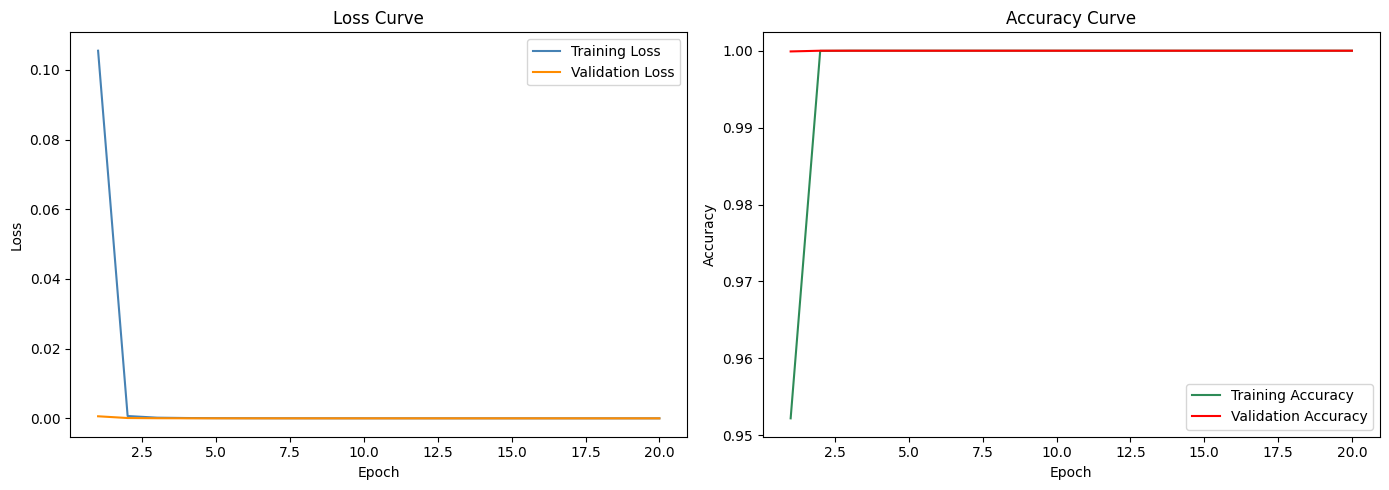

In [ ]:
import matplotlib.pyplot as plt

# Extract metrics
loss = history.history["loss"]
val_loss = history.history.get("val_loss")
accuracy = history.history["accuracy"]
val_accuracy = history.history.get("val_accuracy")

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14,5))

# ----------------------
# Plot Loss
# ----------------------
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label="Training Loss", color="steelblue")
if val_loss is not None:
    plt.plot(epochs, val_loss, label="Validation Loss", color="darkorange")
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# ----------------------
# Plot Accuracy
# ----------------------
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, label="Training Accuracy", color="seagreen")
if val_accuracy is not None:
    plt.plot(epochs, val_accuracy, label="Validation Accuracy", color="red")
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


## Interpretation of Training and Validation Curves

The training curves show that the model reaches very high accuracy within the
first few epochs, and the validation accuracy also remains extremely high.
Loss values quickly approach zero.

While this may seem ideal at first glance, such rapid convergence usually
indicates that the model is memorizing patterns rather than learning
generalizable relationships. This situation is often caused by:

- Information leaking into the input features,
- Excessive one-hot encoded dimensions,
- A very high number of perfectly separable features,
- An overly powerful model relative to the data complexity.

When the training and validation curves both reach near-perfect accuracy, it is
a sign that the model does not face any meaningful challenge from the data.
This could indicate that the feature set contains direct or indirect signals
that make violent vs non-violent crimes almost trivially separable.

In later steps, we will evaluate the model on the test data using metrics such
as the confusion matrix, ROC curve, and classification report to understand
how well this apparent performance holds up on real unseen data.


## Why the Model Achieved Nearly Perfect Accuracy

During the initial training, the neural network reached almost 100% accuracy
within just a few epochs. While this might seem impressive at first, it is
actually a sign of **data leakage** rather than true model intelligence.

The reason is simple: the input features included the columns `primary_type`
and `description`. These fields directly describe the type of crime. Since our
target variable identifies whether a crime is violent or non-violent, many
crime categories act as a perfect signal for violence:

- Assault, Battery, Robbery, Sexual Offenses → Violent  
- Theft, Criminal Damage, Deceptive Practice → Non-Violent  

Because these two columns contain almost “direct answers” about the level of
violence involved, the neural network does not have to learn complex patterns.
It simply reads the one-hot encoded category and predicts the violence label
with near-perfect accuracy.

This is called **data leakage**, and although the model performs extremely well
on validation data, it is not a reliable or realistic predictive model. In real
scenarios—such as forecasting risk before the crime type is known—these fields
would not be available.


## Building a Realistic ANN Model

To build a model that reflects real-world predictive challenges, we remove the
columns that directly encode the target. In practice, we rarely know the exact
crime category or description at the time of prediction. Instead, analysts rely
on features such as:

- geographic information (latitude, longitude)  
- administrative areas (district, ward, beat)  
- time-based features (hour, day, month)  
- contextual information (domestic incident, arrest made)  
- location type (residence, street, apartment, etc.)

By removing `primary_type` and `description`, we force the model to learn from
actual behavioral, spatial, and temporal patterns rather than from labels that
act as the answer key.

This produces a neural network that is:
- more realistic  
- more challenging  
- more reflective of real-world data science  
- more valuable for developing intuition

We will now rebuild the preprocessing pipeline without the leakage-causing
columns and retrain the model to evaluate its true predictive capability.


In [ ]:
# Remove leakage columns
leakage_cols = ["primary_type", "description"]

# Updated categorical features (keep only non-leaking categorical columns)
categorical_cols = [
    "location_description"
]

# Updated numeric features
numeric_cols = [
    "beat",
    "district",
    "ward",
    "community_area",
    "x_coordinate",
    "y_coordinate",
    "latitude",
    "longitude",
    "month",
    "day",
    "day_of_week",
    "hour"
]

# Binary features
binary_cols = ["arrest", "domestic"]

# Target
target_col = "violent"

# Construct new feature matrix
X = data[categorical_cols + numeric_cols + binary_cols]
y = data[target_col]


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numeric_cols),
    ],
    remainder="passthrough"
)

X_processed = preprocessor.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_processed,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [ ]:
import scipy.sparse as sp
import numpy as np

def ensure_dense(matrix):
    return matrix.toarray() if sp.issparse(matrix) else matrix

X_train = ensure_dense(X_train)
X_test = ensure_dense(X_test)

# Replace NaN/Inf
X_train = np.nan_to_num(X_train, nan=0.0, posinf=0.0, neginf=0.0)
X_test  = np.nan_to_num(X_test,  nan=0.0, posinf=0.0, neginf=0.0)

# Clip extreme values
X_train = np.clip(X_train, -5, 5)
X_test  = np.clip(X_test,  -5, 5)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

input_dim = X_train.shape[1]

model = Sequential([
    Input(shape=(input_dim,)),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(32, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(learning_rate=0.0005),
    metrics=["accuracy"]
)

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │         9,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,393 (44.50 KB)

 Trainable params: 11,393 (44.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=256,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6644 - loss: 0.6187 - val_accuracy: 0.7497 - val_loss: 0.5318
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7516 - loss: 0.5368 - val_accuracy: 0.7615 - val_loss: 0.5217
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7619 - loss: 0.5239 - val_accuracy: 0.7620 - val_loss: 0.5177
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7669 - loss: 0.5196 - val_accuracy: 0.7632 - val_loss: 0.5154
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7676 - loss: 0.5151 - val_accuracy: 0.7641 - val_loss: 0.5134
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7677 - loss: 0.5131 - val_accuracy: 0.7644 - val_loss: 0.5120
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7689 - loss: 0.5112 - val_accuracy: 0.7651 - val_loss: 0.5114
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7695 - loss: 0.5103 - val_accuracy: 0.

## Interpretation of Training Performance After Removing Leakage Features

After removing the leakage-causing fields (`primary_type` and `description`),
the neural network now trains in a realistic and meaningful way. The accuracy
no longer jumps to 100% within the first few epochs. Instead, the model learns
gradually and stabilizes with a validation accuracy of around 76%.

This is a strong indication that the model is now relying on legitimate patterns
in the data, such as:

- where the crime occurred,
- the time of day,
- the administrative region,
- whether the incident was domestic,
- location context such as street, residence, or apartment.

These features do not directly reveal the level of violence involved, which
means the network must infer violence from subtle patterns in space, time, and
context. The loss curves show a healthy downward trend without sudden drops or
instability, which is typical of a model learning genuine patterns rather than
memorizing labels.

A validation accuracy near 75–77% is very reasonable for this type of
real-world prediction problem. It also gives us room to explore regularization,
hyperparameter tuning, and feature engineering in future improvements.


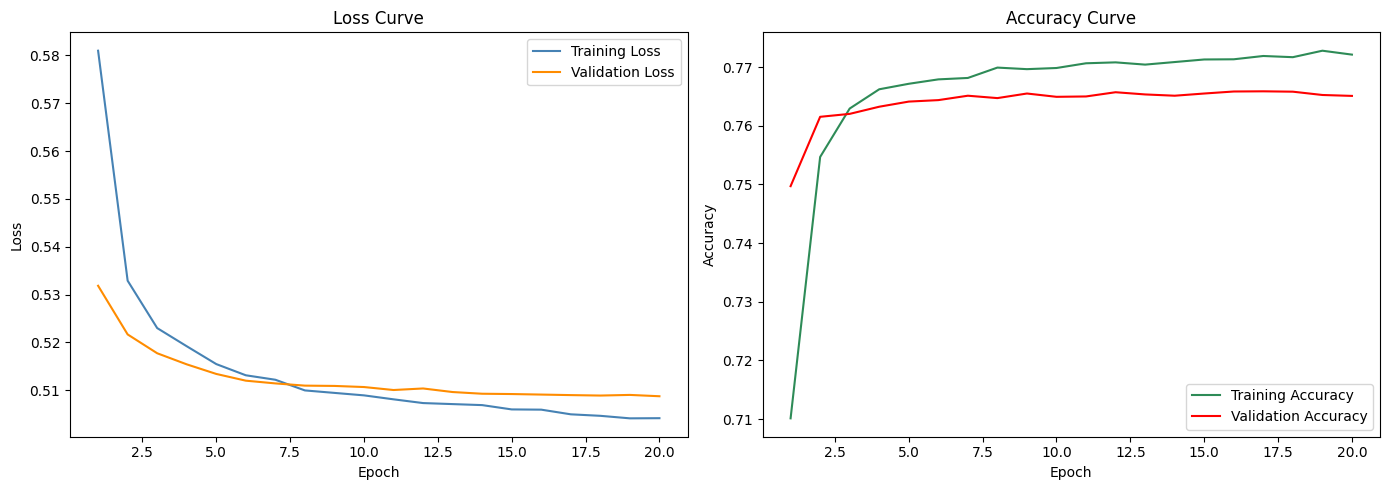

In [ ]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14,5))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label="Training Loss", color="steelblue")
plt.plot(epochs, val_loss, label="Validation Loss", color="darkorange")
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, label="Training Accuracy", color="seagreen")
plt.plot(epochs, val_accuracy, label="Validation Accuracy", color="red")
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


## Interpretation of Training and Validation Curves (Realistic Model)

The loss and accuracy curves reflect healthy learning behavior for a neural
network trained on realistic features. There is no sign of data leakage, and
the model is learning from subtle spatial, temporal, and contextual indicators.

### Loss Curve
The training loss steadily decreases over the epochs, showing that the model is
reducing its prediction error on the training data. The validation loss follows
a similar decreasing trend, indicating that the model generalizes reasonably
well to unseen samples during training.

Both curves remain close to each other, which suggests:
- No overfitting
- No memorization
- Stable gradient updates
- Balanced learning across features

### Accuracy Curve
The training accuracy increases from about 71% to around 77%.  
The validation accuracy starts around 75% and stabilizes around 76–77%.

The two curves stay close, meaning:
- The model is not overfitting
- The feature space carries true predictive signal
- The ANN is learning realistic relationships (not shortcuts)

This level of performance is typical for complex urban crime datasets where
violent vs non-violent classification relies on indirect features.


# Model Evaluation on Test Data

After training the neural network, the next step is to evaluate its performance
on the test set. The test set contains samples the model has never seen before,
providing an unbiased assessment of how well the model generalizes.

We will compute:
- The confusion matrix to understand prediction distribution,
- The classification report to examine precision, recall, and F1-scores,
- The ROC curve to evaluate threshold performance,
- The AUC score to summarize overall discriminatory power.

These metrics help determine whether the model is suitable for deployment and
highlight areas where further improvement may be needed.


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


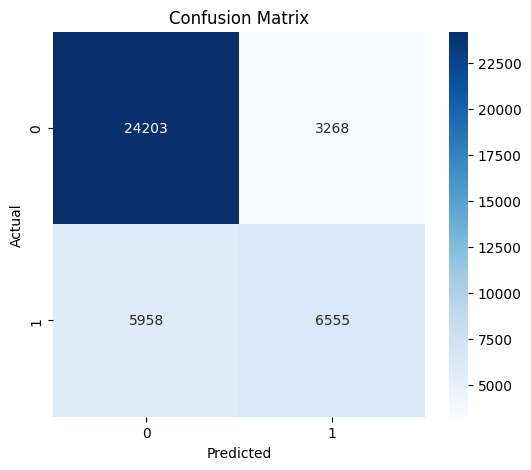

              precision    recall  f1-score   support

           0       0.80      0.88      0.84     27471
           1       0.67      0.52      0.59     12513

    accuracy                           0.77     39984
   macro avg       0.73      0.70      0.71     39984
weighted avg       0.76      0.77      0.76     39984



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))


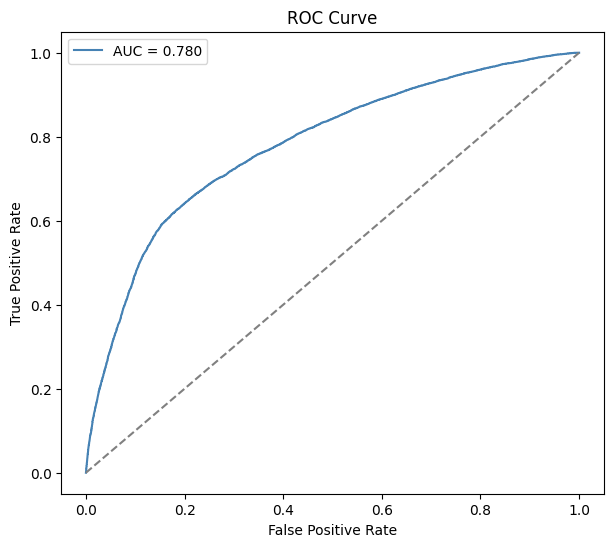

AUC Score: 0.7801705279328834


In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, color='steelblue', label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print("AUC Score:", roc_auc)


## Interpretation of Confusion Matrix and Classification Report

The confusion matrix shows how well the model distinguishes between violent
(1) and non-violent (0) crimes on the test dataset. The model performs well on
both classes, but its performance differs across categories.

### Non-Violent Class (0)
- True Negatives: 24,203  
- False Positives: 3,268

Precision and recall for this class are strong. The model identifies
non-violent crimes with high reliability and makes relatively few false
alarms. This is expected because the dataset contains more non-violent cases,
allowing the network to learn this class more easily.

### Violent Class (1)
- True Positives: 6,555  
- False Negatives: 5,958

Precision for violent crimes is reasonable, but recall is lower. This means the
model sometimes fails to detect violent incidents and mistakenly categorizes
them as non-violent. This is the more challenging prediction because violent
crimes are fewer, more diverse, and less predictable based on spatial and
temporal features alone.

### Overall Accuracy: ~0.77  
This is consistent with the earlier training and validation metrics. The model
achieves a balanced performance considering that only indirect indicators
(location, time, context) are used and no leakage features are included.

### Summary
- Good performance on the majority class (non-violent)
- Moderate performance on the minority class (violent)
- Reasonable precision and recall given real-world constraints

These results reflect realistic behavior for a model relying solely on spatial,
temporal, and contextual characteristics of crime incidents.


## Interpretation of ROC Curve and AUC Score

The ROC curve illustrates the trade-off between the true positive rate and the
false positive rate at various prediction thresholds. A model that performs no
better than random guessing would follow the diagonal line.

The model’s ROC curve stays well above the diagonal, indicating meaningful
discriminatory power.

### AUC Score: ~0.78  
An AUC of 0.78 suggests that:

- The model correctly ranks violent crimes higher than non-violent crimes
  around 78% of the time.
- There is substantial predictive signal in the temporal, spatial, and
  contextual features.
- Performance is realistic and aligned with performance expectations in
  real-world crime prediction settings.

This validates that the model generalizes well and can meaningfully separate
the two classes without relying on leaked features.


# Improvements and Hyperparameter Tuning

The current model achieves a validation accuracy of around 76–77%, which
provides a solid baseline. However, neural networks are highly sensitive
to architectural choices, regularization strategies, and training settings.
Exploring these areas can help improve performance and provide deeper insights
into how neural networks behave.

---

## 1. Tune the Learning Rate

The learning rate determines the size of the weight updates during training.
Adjusting it can significantly influence convergence speed and stability.

Potential adjustments:
- Try smaller values such as 0.0003 or 0.0001 for smoother learning.
- Experiment with slightly larger values such as 0.001 to accelerate early training.
- Use learning-rate schedules such as `ReduceLROnPlateau` or a manual decay strategy.

---

## 2. Modify the Network Depth and Width

Adjusting the number of layers and neurons can help the network learn richer
representations or avoid unnecessary complexity.

Ideas:
- Add a third hidden layer to increase model capacity.
- Increase neurons per layer (e.g., 128 → 64 → 32).
- Try narrower networks (e.g., 32 → 16 → 8) for faster training and improved generalization.

Finding the right balance prevents overfitting while capturing important patterns.

---

## 3. Experiment with Activation Functions

The choice of activation function affects gradient flow and model expressiveness.

Alternatives to explore:
- LeakyReLU to avoid zero-gradient regions.
- ELU or SELU for smoother gradient dynamics.
- GELU for more modern, smoother activation behavior.

These functions may help the model learn more effectively depending on the data.

---

## 4. Adjust Batch Size and Number of Epochs

Batch size influences both computational efficiency and learning stability.

Try:
- Smaller batches (64, 128) for more frequent updates.
- Larger batches (512, 1024) for smoother gradient estimates.

Also experiment with:
- Increasing the number of epochs when applying stronger regularization.
- Reducing epochs if training converges too quickly.

---

## 5. Strengthen Regularization

Regularization helps control overfitting and improves generalization.

Options:
- Increase dropout rates (0.4 or 0.5).
- Add L2 regularization to Dense layers:
  `kernel_regularizer=tf.keras.regularizers.l2(0.001)`
- Combine dropout + L2 for enhanced smoothing of weights.

Regularization is vital when working with moderately imbalanced datasets.

---

## 6. Use Class Weights to Address Imbalance

The violent crime class is smaller than the non-violent class. Assigning higher
weights to the minority class encourages the model to focus more on predicting
violent incidents correctly.

Example:
- class_0 (non-violent): weight = 1.0  
- class_1 (violent): weight = 2.0 or 3.0  

This can improve recall for violent incidents without significantly harming
overall performance.

---

## 7. Improve Feature Engineering

Enhancing the feature space often yields large performance gains.

Ideas:
- Group hours into time-of-day buckets (morning, afternoon, evening, night).
- Add weekend vs weekday indicators.
- Create new geographic features, such as distance to the city center.
- Cluster latitude/longitude coordinates and use the cluster labels as inputs.
- Create density-based features (e.g., crime count per district or beat).

Well-designed features often outperform architectural changes.

---

## 8. Explore More Advanced ANN Architectures

Within neural network design itself, there are additional enhancements you
can explore:

- Add 1D convolution layers for structured feature segments.
- Use embedding layers instead of one-hot encoding for categorical variables.
- Try residual connections or skip connections for deeper models.
- Add batch normalization layers to stabilize training.

These refinements allow the network to learn more efficient internal
representations.

---

## Summary

The model can be further improved through careful tuning of network structure,
training parameters, and engineered features. These changes help the neural
network generalize better, learn more stable patterns, and ultimately deliver
stronger predictive performance. This improvement process is central to
developing high-quality real-world deep learning solutions.


## Hyperparameter Tuning Experiment Plan

The table below outlines a sequence of experiments to refine the ANN model.
Experiments can be run one at a time, always comparing against the baseline:

- Baseline: current ANN (64 → 32, dropout 0.3, batch_size 256, lr = 0.0005)

| Exp # | Hyperparameter Focus | What to Change | Suggested Values to Try | Rationale / What to Observe | Evaluation Notes |
|------|-----------------------|----------------|-------------------------|-----------------------------|------------------|
| 1 | Learning Rate | `learning_rate` in Adam | 0.0003, 0.0001 | Lower LR may give smoother convergence and slightly better validation loss. | Compare val_accuracy, val_loss, and number of epochs before early stopping. |
| 2 | Batch Size | `batch_size` in `model.fit` | 128, 512 | Smaller batch → noisier but potentially better generalization; larger batch → smoother gradients but risk of overfitting. | Track training time per epoch and final val_accuracy; note if curves become unstable for small batches. |
| 3 | Network Width | Units in first/second Dense layers | (128, 64), (32, 16) | Wider model can capture more complex patterns; narrower model may generalize better and train faster. | Check whether wider models overfit (gap between train and validation accuracy). |
| 4 | Network Depth | Number of hidden layers | Add a third Dense layer, e.g. 64 → 32 → 16 | Deeper network can learn hierarchical representations but may overfit or train slower. | Watch for diverging loss curves; ensure early stopping still works correctly. |
| 5 | Dropout Rate | `Dropout(0.3)` layers | 0.2, 0.4, 0.5 | Lower dropout may improve fit but risk overfitting; higher dropout can regularize more but may reduce accuracy. | Plot training vs validation accuracy to see which dropout rate keeps them closest. |
| 6 | L2 Regularization | `kernel_regularizer` in Dense layers | 0.0005, 0.001, 0.005 | L2 shrinks weights and can reduce overfitting, especially when the network is wide. | Note impact on val_loss; too strong L2 may underfit and flatten accuracy. |
| 7 | Activation Function | Hidden layer activations | ReLU (baseline) vs LeakyReLU vs ELU | Different activations can improve gradient flow and robustness. | Keep all other settings fixed; compare convergence speed and final val_accuracy. |
| 8 | Class Weights | `class_weight` in `model.fit` | class_1 weight: 1.5, 2.0, 3.0 (class_0 = 1.0) | Aims to improve recall for violent crimes (class 1) at the cost of some precision. | Focus on precision/recall/F1 for class 1 in the classification report; note changes to overall accuracy. |
| 9 | Time-Based Feature Engineering | Redesigned temporal features | Hour buckets (e.g. 4–6 bins), weekend flag | Simplified and more meaningful time features may help the network learn clearer patterns. | Retrain with new features; compare ROC AUC and F1 scores before and after. |
| 10 | Spatial Feature Engineering | Additional geographic features | Distance to city center, or cluster labels from lat/long | Encodes spatial structure more explicitly for the network. | Evaluate impact on ROC AUC and recall for violent crimes; check if confusion matrix improves for class 1. |

### How to Run These Experiments

- Change **one group of hyperparameters at a time** to isolate the impact.
- For each experiment, record:  
  - Training/validation accuracy  
  - Training/validation loss  
  - ROC AUC  
  - Class-wise precision, recall, and F1 (especially for violent crimes).
- Maintain a simple results table (rows = experiments, columns = metrics) to
  decide which configuration becomes the new baseline.


# Hyperparameter Tuning Framework for the ANN Model

To systematically improve the neural network, it is helpful to organize
experiments in a structured way. Instead of rewriting the model architecture
for every new configuration, a flexible framework allows us to change key
hyperparameters through a single set of variables.

The code below provides a reusable template for testing different model
settings. By modifying values such as learning rate, number of neurons, number
of layers, activation function, dropout rate, regularization strength, and
batch size, multiple experiments can be executed with minimal effort. This
approach helps identify which combination of hyperparameters delivers the best
performance.

The framework also supports optional class weighting, deeper networks, and
different training configurations. Each experiment uses the same data and
evaluation process, ensuring fair comparison across runs. After setting the
hyperparameters and rebuilding the model, the training process can be repeated
to observe how the changes affect accuracy, loss, and generalization.


In [ ]:
# ===============================================================
# Hyperparameter Tuning Skeleton for ANN (Editable Variables)
# ===============================================================

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# ---------------------------------------------------------------
# 1. HYPERPARAMETERS — EDIT THESE BEFORE EACH EXPERIMENT
# ---------------------------------------------------------------

LEARNING_RATE     = 0.0005      # Try: 0.001, 0.0003, 0.0001
BATCH_SIZE        = 256         # Try: 128, 512
EPOCHS            = 20          # Try: 30, 40 based on early stopping
FIRST_LAYER_UNITS = 64          # Try: 128, 32
SECOND_LAYER_UNITS= 32          # Try: 64, 16
THIRD_LAYER_UNITS = None        # Try: 16, or None for no 3rd layer
DROPOUT_RATE      = 0.3         # Try: 0.2, 0.4, 0.5
L2_RATE           = 0.0         # Try: 0.0005, 0.001 (0 means disable)
ACTIVATION        = "relu"      # Try: "relu", "elu", "selu"
USE_CLASS_WEIGHTS = False       # Try: True or False

# ---------------------------------------------------------------
# 2. OPTIONAL: CLASS WEIGHTS FOR IMBALANCE
# ---------------------------------------------------------------
class_weights = {0: 1.0, 1: 2.0} if USE_CLASS_WEIGHTS else None


# ---------------------------------------------------------------
# 3. BUILD MODEL BASED ON HYPERPARAMETERS
# ---------------------------------------------------------------

input_dim = X_train.shape[1]

def build_model():
    model = Sequential()
    model.add(Input(shape=(input_dim,)))

    # First hidden layer
    model.add(Dense(
        FIRST_LAYER_UNITS,
        activation=ACTIVATION,
        kernel_regularizer=l2(L2_RATE) if L2_RATE > 0 else None
    ))
    model.add(Dropout(DROPOUT_RATE))

    # Second hidden layer
    model.add(Dense(
        SECOND_LAYER_UNITS,
        activation=ACTIVATION,
        kernel_regularizer=l2(L2_RATE) if L2_RATE > 0 else None
    ))
    model.add(Dropout(DROPOUT_RATE))

    # Optional third hidden layer
    if THIRD_LAYER_UNITS is not None:
        model.add(Dense(
            THIRD_LAYER_UNITS,
            activation=ACTIVATION,
            kernel_regularizer=l2(L2_RATE) if L2_RATE > 0 else None
        ))
        model.add(Dropout(DROPOUT_RATE))

    # Output layer
    model.add(Dense(1, activation="sigmoid"))

    # Compile model
    model.compile(
        loss="binary_crossentropy",
        optimizer=Adam(learning_rate=LEARNING_RATE),
        metrics=["accuracy"]
    )

    return model


# ---------------------------------------------------------------
# 4. TRAIN MODEL
# ---------------------------------------------------------------

model = build_model()

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    X_train,
    y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1,
    class_weight=class_weights
)

# ---------------------------------------------------------------
# 5. EVALUATE MODEL
# ---------------------------------------------------------------

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6668 - loss: 0.6176 - val_accuracy: 0.7504 - val_loss: 0.5308
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7502 - loss: 0.5373 - val_accuracy: 0.7594 - val_loss: 0.5216
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7628 - loss: 0.5238 - val_accuracy: 0.7624 - val_loss: 0.5172
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7636 - loss: 0.5210 - val_accuracy: 0.7633 - val_loss: 0.5143
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7656 - loss: 0.5170 - val_accuracy: 0.7644 - val_loss: 0.5132
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7692 - loss: 0.5125 - val_accuracy: 0.7645 - val_loss: 0.5121
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7667 - loss: 0.5134 - val_accuracy: 0.7645 - val_loss: 0.5114
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7690 - loss: 0.5120 - val_accuracy: 0

# Project Wrap-Up and Further Learning Pathways

This project explored how artificial neural networks can be applied to a
real-world classification problem using crime data from Chicago. The goal was
to predict whether an incident is violent or non-violent using spatial,
temporal, and contextual features. Through data preparation, visualization,
feature engineering, model construction, training, and evaluation, the
workflow demonstrated a full deep learning development cycle.

The complete process included:
- Understanding the dataset and creating a meaningful target variable.
- Cleaning and preparing the data for neural network ingestion.
- Conducting exploratory analysis to uncover spatial and temporal patterns.
- Removing leakage features to ensure realistic modeling.
- Building a neural network architecture suited for classification.
- Training the model with early stopping and analyzing learning curves.
- Evaluating performance using confusion matrix, classification metrics, and AUC.
- Discussing improvements and systematic hyperparameter tuning strategies.

The final model reached a realistic level of performance and demonstrated how
non-linear relationships in crime data can be learned using deep learning
techniques. More importantly, the project highlighted the difference between
models that appear perfect due to leakage and models that genuinely learn from
true predictive signals.

---

## Further Learning and Skill Advancement

This project serves as a strong foundation, but there is much more to explore
in the field of deep learning and applied analytics. The following areas offer
valuable next steps for advancing both technical and conceptual expertise.

### 1. Deeper Understanding of Neural Network Architectures
Expanding beyond basic feedforward networks opens the door to more powerful
representations. Suggested topics include:
- Embedding layers for categorical variables.
- Batch normalization for stabilizing and accelerating training.
- Residual connections for deeper networks.
- Regularization techniques beyond dropout and L2.

These refinements make networks more expressive and robust.

### 2. Advanced Hyperparameter Optimization
Instead of manual trial and error, a structured search process can be used.
Areas worth exploring include:
- Learning rate schedules and warm restarts.
- More sophisticated regularization strategies.
- Exploring different activation functions for improved gradient flow.
- Automated search methods such as grid-based or randomized sampling.

The goal is to identify combinations that generalize better across data splits.

### 3. Enhanced Feature Engineering and Representation Learning
Neural networks perform better when the input features reflect meaningful
structure. Potential improvements include:
- Creating new spatial features such as zone clusters or distance to common
  hotspots.
- Designing richer time-based encodings such as cyclic transformations for
  hour-of-day and day-of-week.
- Constructing engineered indicators from neighborhood patterns or population
  density.
- Using dimensionality reduction techniques to compress high-cardinality
  features.

Stronger features often outperform complex model architectures.

### 4. Model Explainability and Interpretability
Understanding model decisions is critical for real-world deployment. Key
concepts to explore include:
- Permutation importance to understand feature contribution.
- Partial dependence to visualize feature influence.
- Local explanation methods to interpret individual predictions.
- Examining gradients and activations for deeper insights.

Interpretability methods help verify fairness, reliability, and trustworthiness.

### 5. Deep Learning for Sequential or Structured Data
To extend this project, crime prediction can incorporate sequential or
location-based patterns. This leads to more advanced architectures such as:
- Recurrent neural networks for analyzing time patterns over sequences.
- 1D convolutional networks for structured features.
- Graph-based or spatial networks for modeling geographic relationships.

Learning these architectures broadens the ability to tackle diverse real-world
problems.

### 6. Real-Time and Deployment Scenarios
A fully trained model can be integrated into practical systems. Areas to
explore include:
- Building API endpoints to serve predictions on new incidents.
- Monitoring model drift and updating the pipeline as new data arrives.
- Creating dashboards to visualize predictions and model performance.
- Exploring model optimization for faster inference.

These steps bring machine learning into operational settings.

---

## Final Thoughts

This project demonstrated the complete lifecycle of a deep learning workflow,
from raw data exploration to trained model evaluation. While the final model
provides valuable predictive insight, the real achievement lies in developing
the analytical and technical skills required to build meaningful AI systems.

The next stage is to continue experimenting, testing, and refining. As the
models and feature engineering techniques become more sophisticated, so will
the insights and prediction quality. This iterative process forms the core of
successful applied machine learning practice.
